## EXP_2467_seq_prune_0_4_256_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [10]:
exp_dict = OrderedDict()

#### Get MNIST data

In [11]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
round0 [2 6 4 7]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0876 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0493 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 7.1373e-04 - accuracy: 0.9997 - val_loss: 0.0785 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 5.9622e-07 - accuracy: 1.0000 - val_loss: 0.0889 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.8113e-07 - accuracy: 1.0000 - val_loss: 0.0961 - val_accuracy: 0.9906


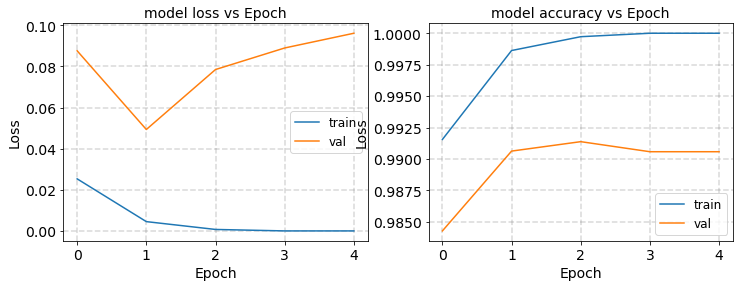

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0416 - accuracy: 0.9931 - val_loss: 0.0339 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 5.7595e-05 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 0.9952
Epoch 3/5
1250/1250 - 3s - loss: 2.3237e-06 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 5.2611e-07 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 3s - loss: 1.4965e-07 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 0.9944


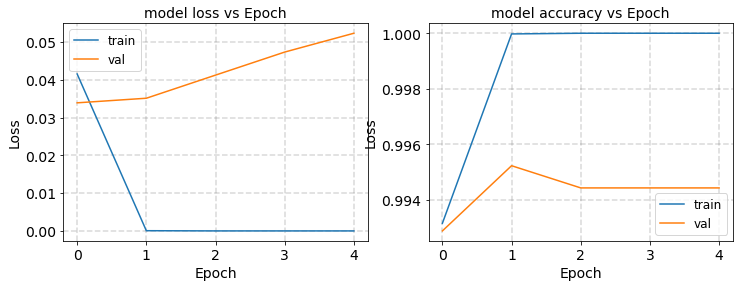

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0651 - accuracy: 0.9890 - val_loss: 0.0349 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 3s - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0298 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0379 - val_accuracy: 0.9938
Epoch 4/5
1250/1250 - 3s - loss: 1.8382e-05 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9938
Epoch 5/5
1250/1250 - 3s - loss: 5.1355e-07 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9938


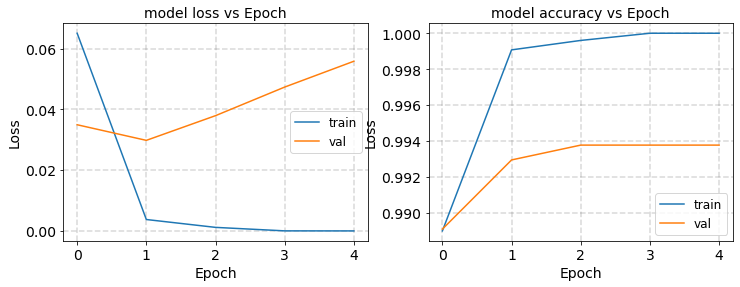

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0720 - accuracy: 0.9896 - val_loss: 0.0455 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0691 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 1.3784e-04 - accuracy: 1.0000 - val_loss: 0.1166 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 1.5675e-06 - accuracy: 1.0000 - val_loss: 0.1353 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 2.7704e-07 - accuracy: 1.0000 - val_loss: 0.1476 - val_accuracy: 0.9913


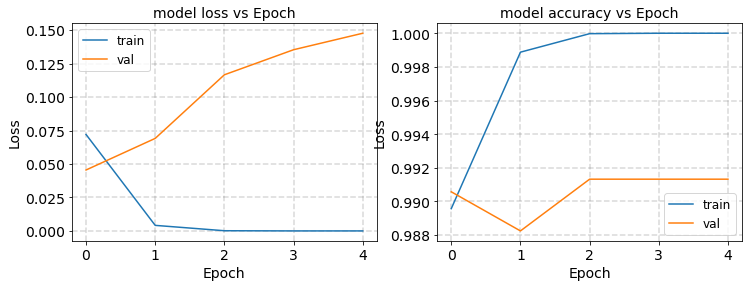

round1 [4 2 7 6]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0688 - accuracy: 0.9914 - val_loss: 0.0405 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0752 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0894 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 1.0004e-04 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 6.6347e-07 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 0.9922


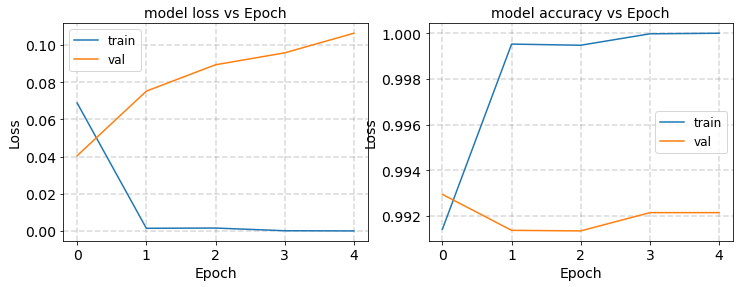

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0772 - accuracy: 0.9875 - val_loss: 0.0575 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0682 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0490 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 4s - loss: 1.4469e-05 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 4s - loss: 1.6619e-06 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9945


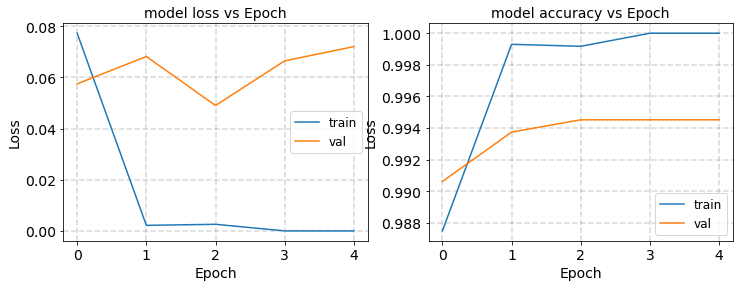

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0707 - accuracy: 0.9892 - val_loss: 0.0272 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 4s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0398 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0636 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 1.7638e-06 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 5.1806e-07 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9906


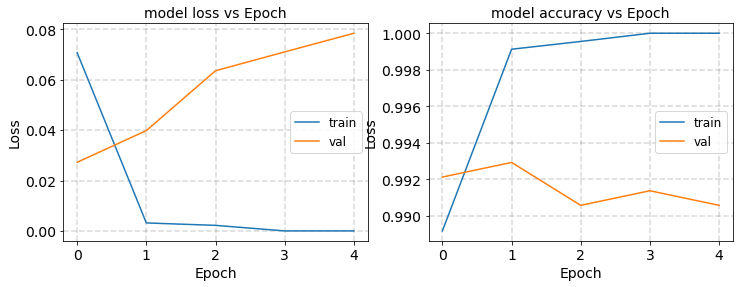

6
Epoch 1/5
1250/1250 - 3s - loss: 0.1220 - accuracy: 0.9883 - val_loss: 0.0264 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 3.8767e-05 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 2.8918e-06 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 5.1077e-07 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 6.4175e-08 - accuracy: 1.0000 - val_loss: 0.0724 - val_accuracy: 0.9929


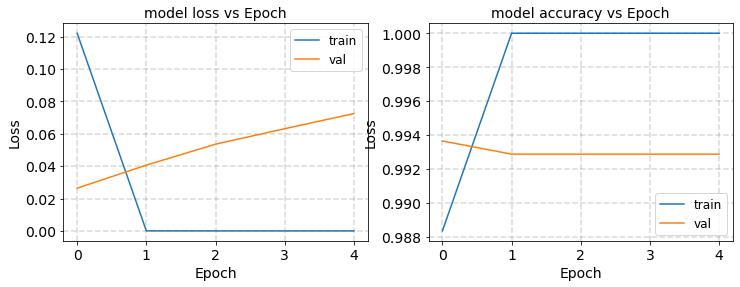

round2 [2 4 7 6]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.1042 - accuracy: 0.9865 - val_loss: 0.0532 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0591 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 3.5626e-05 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 7.0858e-06 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 1.9254e-06 - accuracy: 1.0000 - val_loss: 0.0948 - val_accuracy: 0.9913


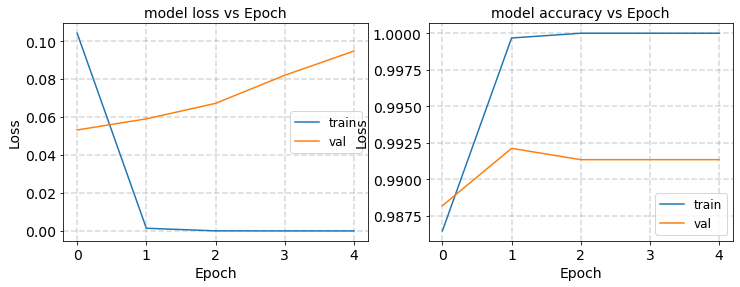

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0657 - accuracy: 0.9921 - val_loss: 0.0501 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0900 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 3s - loss: 3.9292e-05 - accuracy: 1.0000 - val_loss: 0.1140 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 1.9717e-06 - accuracy: 1.0000 - val_loss: 0.1339 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 5.3890e-07 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 0.9875


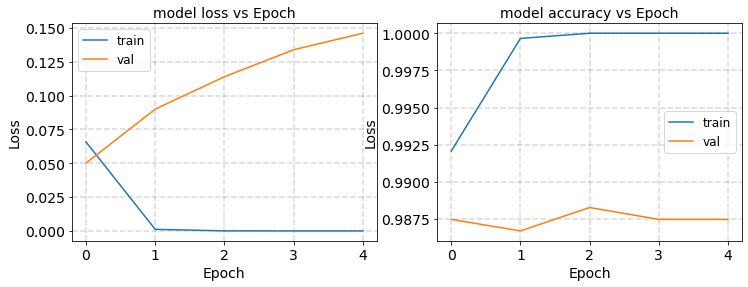

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0882 - accuracy: 0.9918 - val_loss: 0.0304 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 8.5913e-04 - accuracy: 0.9998 - val_loss: 0.0349 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 2.5959e-05 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 4.3303e-06 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 1.4372e-06 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 0.9921


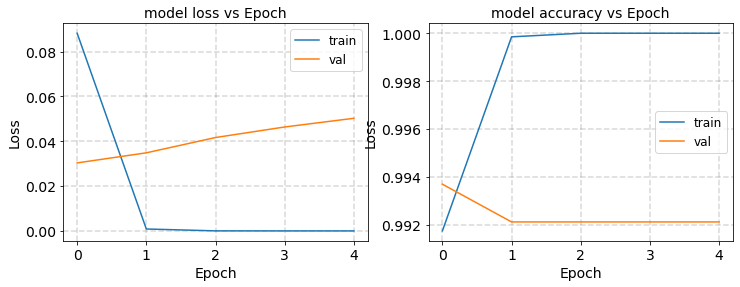

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0714 - accuracy: 0.9942 - val_loss: 0.0341 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 1.1476e-05 - accuracy: 1.0000 - val_loss: 0.0386 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 2.6949e-06 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 5.6981e-07 - accuracy: 1.0000 - val_loss: 0.0515 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 1.6586e-07 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9937


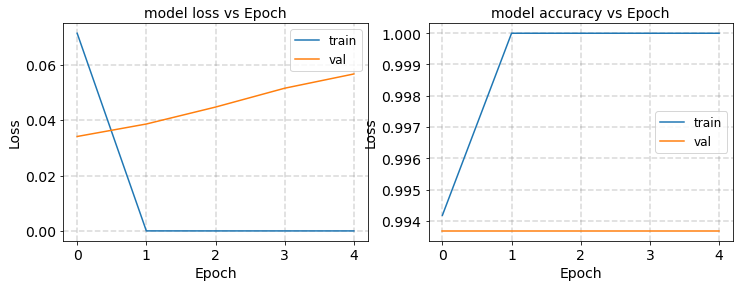

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_61 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_62 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_63 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_65 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

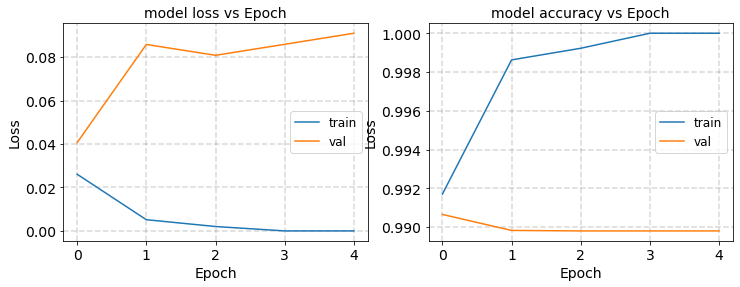

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0612 - accuracy: 0.9859 - val_loss: 0.0271 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0390 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0323 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0382 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 4s - loss: 4.6102e-04 - accuracy: 0.9998 - val_loss: 0.0524 - val_accuracy: 0.9930


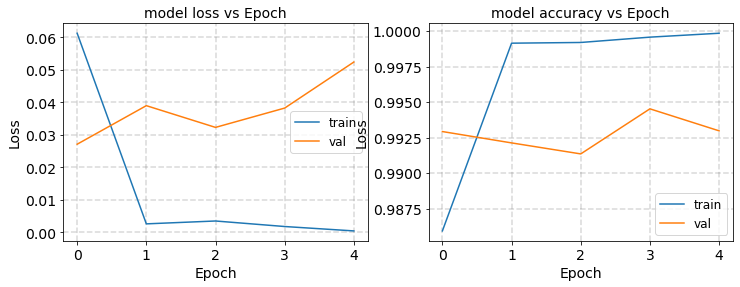

6
Epoch 1/5
1250/1250 - 5s - loss: 0.0506 - accuracy: 0.9912 - val_loss: 0.0312 - val_accuracy: 0.9952
Epoch 2/5
1250/1250 - 5s - loss: 3.5129e-04 - accuracy: 0.9999 - val_loss: 0.0728 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 5s - loss: 4.3148e-06 - accuracy: 1.0000 - val_loss: 0.0882 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 1.4673e-06 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 4s - loss: 5.9946e-07 - accuracy: 1.0000 - val_loss: 0.1091 - val_accuracy: 0.9944


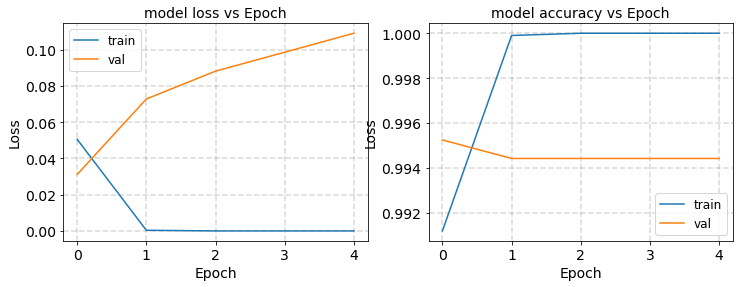

7
Epoch 1/5
1250/1250 - 4s - loss: 0.2136 - accuracy: 0.9900 - val_loss: 0.0275 - val_accuracy: 0.9946
Epoch 2/5
1250/1250 - 4s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0524 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 5.7843e-06 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 4s - loss: 4.2948e-07 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 1.3314e-07 - accuracy: 1.0000 - val_loss: 0.0948 - val_accuracy: 0.9922


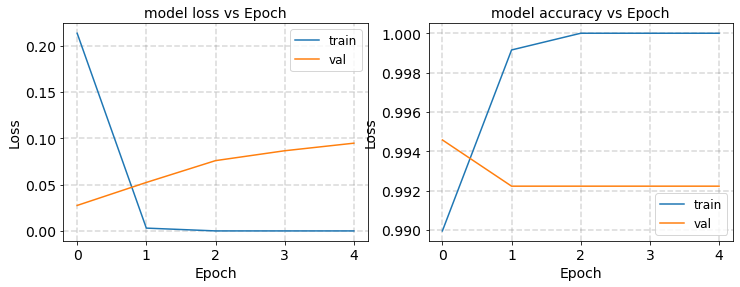

round1 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 5.2441e-08 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9915
Epoch 2/5
1250/1250 - 3s - loss: 2.2986e-08 - accuracy: 1.0000 - val_loss: 0.1075 - val_accuracy: 0.9915
Epoch 3/5
1250/1250 - 3s - loss: 1.0944e-08 - accuracy: 1.0000 - val_loss: 0.1123 - val_accuracy: 0.9915
Epoch 4/5
1250/1250 - 3s - loss: 5.5465e-09 - accuracy: 1.0000 - val_loss: 0.1170 - val_accuracy: 0.9915
Epoch 5/5
1250/1250 - 4s - loss: 2.8854e-09 - accuracy: 1.0000 - val_loss: 0.1214 - val_accuracy: 0.9915


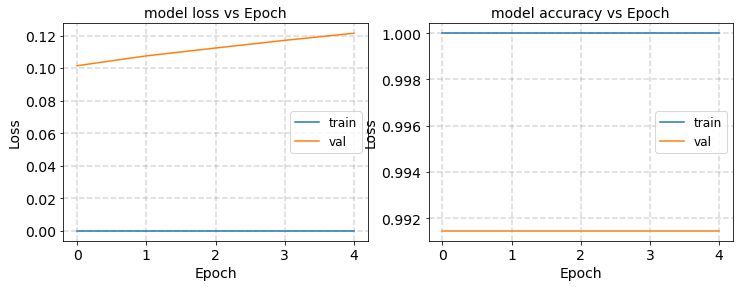

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0950 - accuracy: 0.9910 - val_loss: 0.1119 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 3s - loss: 2.8434e-04 - accuracy: 0.9999 - val_loss: 0.1389 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 2.7695e-06 - accuracy: 1.0000 - val_loss: 0.1617 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 8.7731e-07 - accuracy: 1.0000 - val_loss: 0.1768 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 3.9609e-07 - accuracy: 1.0000 - val_loss: 0.1882 - val_accuracy: 0.9914


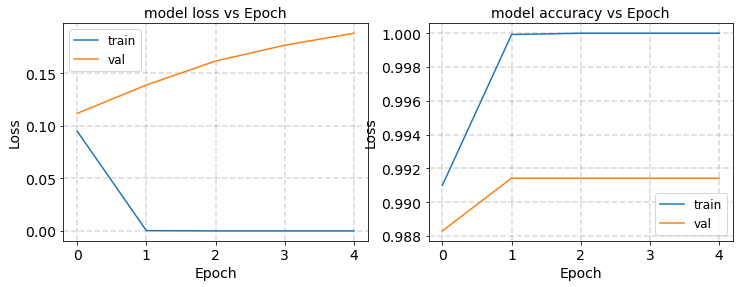

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0751 - accuracy: 0.9922 - val_loss: 0.0470 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 4s - loss: 4.8628e-05 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 8.3749e-06 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 4s - loss: 2.6304e-06 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 4s - loss: 1.0459e-06 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9952


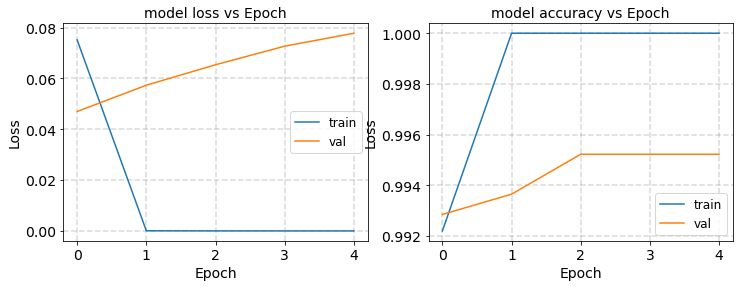

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0917 - accuracy: 0.9904 - val_loss: 0.0577 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 4s - loss: 1.2647e-04 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 1.0201e-05 - accuracy: 1.0000 - val_loss: 0.1057 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 3s - loss: 1.0015e-06 - accuracy: 1.0000 - val_loss: 0.1225 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 4s - loss: 2.9596e-07 - accuracy: 1.0000 - val_loss: 0.1341 - val_accuracy: 0.9867


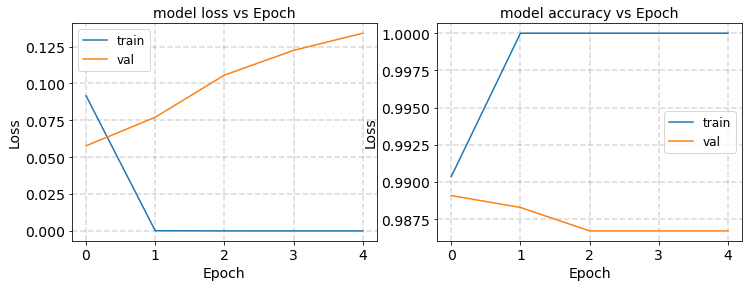

round2 [6 2 4 7]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0843 - accuracy: 0.9866 - val_loss: 0.0262 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 4s - loss: 3.4824e-04 - accuracy: 0.9999 - val_loss: 0.0457 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 7.9653e-06 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 2.5401e-06 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 9.7578e-07 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 0.9921


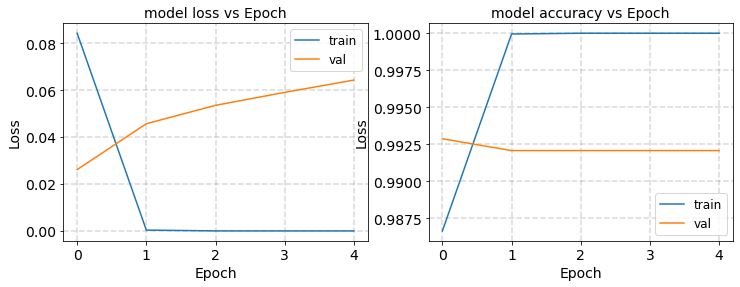

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0637 - accuracy: 0.9879 - val_loss: 0.0675 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0646 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 4.2708e-04 - accuracy: 0.9998 - val_loss: 0.0847 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 4s - loss: 7.5297e-06 - accuracy: 1.0000 - val_loss: 0.0993 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 5s - loss: 2.1393e-06 - accuracy: 1.0000 - val_loss: 0.1096 - val_accuracy: 0.9914


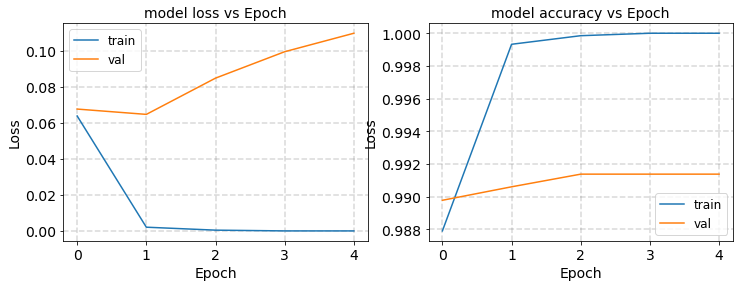

4
Epoch 1/5
1250/1250 - 5s - loss: 0.0688 - accuracy: 0.9909 - val_loss: 0.0381 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 5s - loss: 7.4110e-04 - accuracy: 0.9998 - val_loss: 0.0555 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 1.0628e-05 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9907
Epoch 4/5
1250/1250 - 5s - loss: 5.5648e-07 - accuracy: 1.0000 - val_loss: 0.0901 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 9.7911e-08 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9915


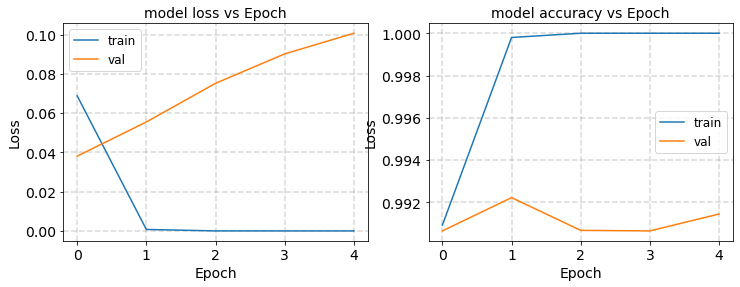

7
Epoch 1/5
1250/1250 - 5s - loss: 0.0864 - accuracy: 0.9912 - val_loss: 0.0293 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 5s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0391 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 5s - loss: 4.7195e-05 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 5s - loss: 1.0075e-05 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 5s - loss: 3.1380e-06 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9922


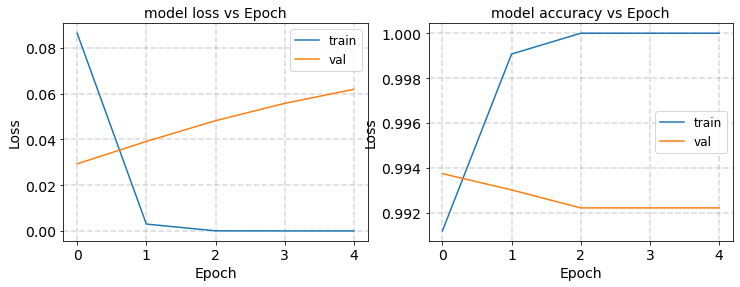

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_67 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_68 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_69 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_71 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

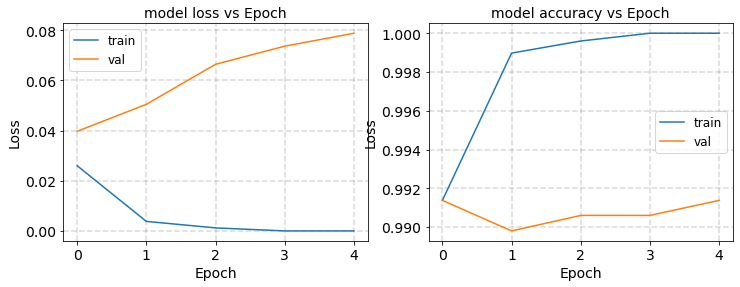

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0411 - accuracy: 0.9930 - val_loss: 0.0578 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0599 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 2.4633e-06 - accuracy: 1.0000 - val_loss: 0.0736 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 4s - loss: 5.5597e-07 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 5s - loss: 1.9449e-07 - accuracy: 1.0000 - val_loss: 0.0902 - val_accuracy: 0.9937


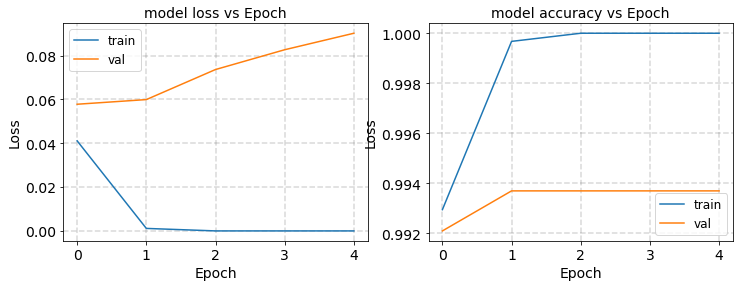

7
Epoch 1/5
1250/1250 - 5s - loss: 0.0947 - accuracy: 0.9918 - val_loss: 0.0358 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 5s - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0279 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 5s - loss: 9.0205e-04 - accuracy: 0.9997 - val_loss: 0.0386 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 5s - loss: 1.5099e-05 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 5s - loss: 2.3235e-06 - accuracy: 1.0000 - val_loss: 0.0568 - val_accuracy: 0.9914


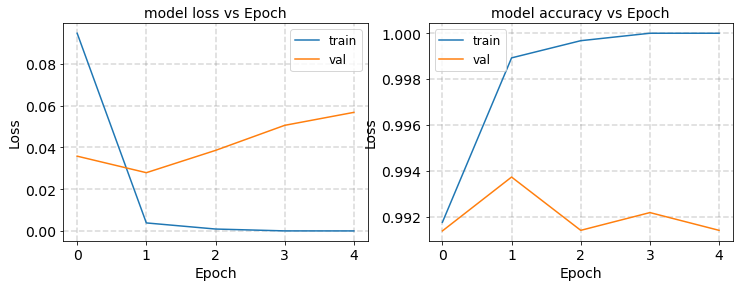

4
Epoch 1/5
1250/1250 - 5s - loss: 0.0868 - accuracy: 0.9870 - val_loss: 0.0227 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 5s - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.0343 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 5s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0444 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0594 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 5s - loss: 1.2191e-05 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9922


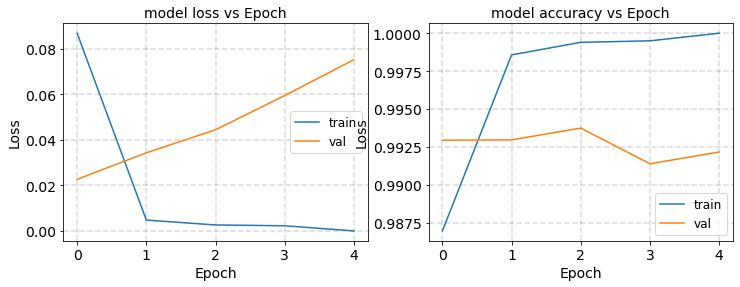

round1 [6 4 2 7]
6
Epoch 1/5
1250/1250 - 6s - loss: 0.0818 - accuracy: 0.9887 - val_loss: 0.0281 - val_accuracy: 0.9952
Epoch 2/5
1250/1250 - 5s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0516 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 5s - loss: 1.2809e-04 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 5s - loss: 8.7473e-06 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 5s - loss: 2.6343e-06 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9952


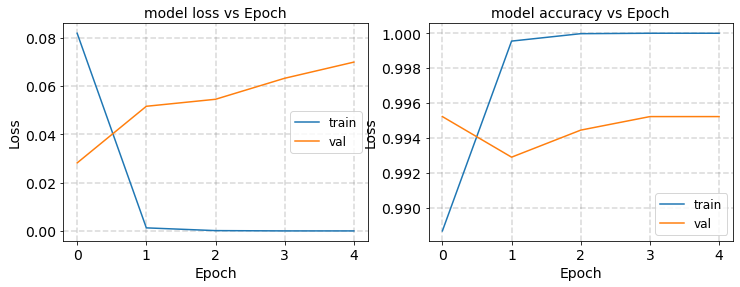

4
Epoch 1/5
1250/1250 - 5s - loss: 0.0604 - accuracy: 0.9909 - val_loss: 0.0387 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 5s - loss: 4.7950e-04 - accuracy: 0.9999 - val_loss: 0.0437 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 5s - loss: 4.5683e-06 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 5s - loss: 7.0943e-07 - accuracy: 1.0000 - val_loss: 0.0587 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 4s - loss: 3.0509e-07 - accuracy: 1.0000 - val_loss: 0.0630 - val_accuracy: 0.9945


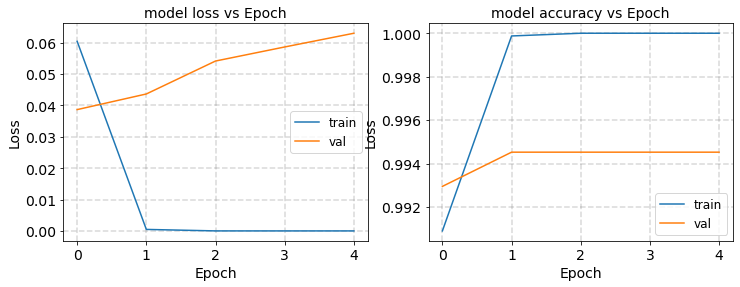

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1290 - accuracy: 0.9819 - val_loss: 0.0492 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 9.6669e-04 - accuracy: 0.9997 - val_loss: 0.0753 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 5.4393e-06 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 5s - loss: 1.4027e-06 - accuracy: 1.0000 - val_loss: 0.0950 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 5s - loss: 3.1057e-07 - accuracy: 1.0000 - val_loss: 0.1072 - val_accuracy: 0.9875


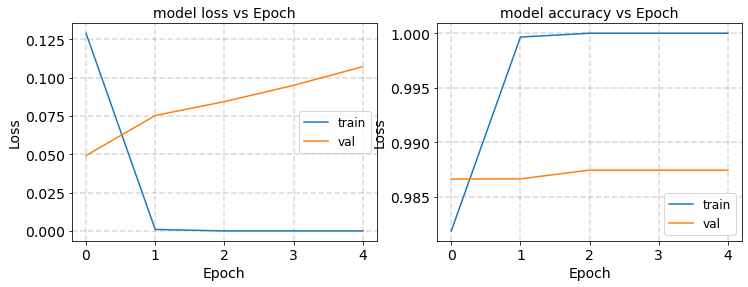

7
Epoch 1/5
1250/1250 - 5s - loss: 0.0868 - accuracy: 0.9891 - val_loss: 0.0533 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 5s - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0634 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 5s - loss: 4.5339e-04 - accuracy: 0.9999 - val_loss: 0.0743 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 6.8687e-06 - accuracy: 1.0000 - val_loss: 0.0853 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 5s - loss: 1.9087e-06 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 0.9922


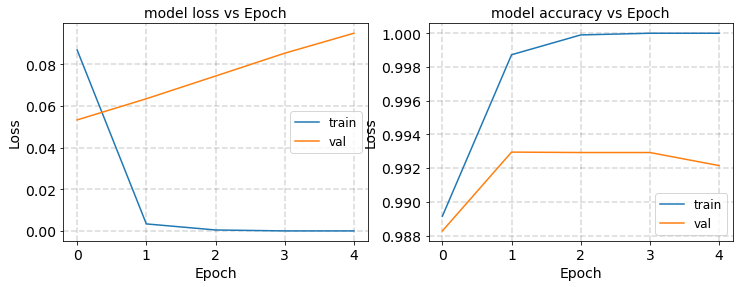

round2 [2 4 6 7]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.1441 - accuracy: 0.9788 - val_loss: 0.0462 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 5s - loss: 9.4208e-04 - accuracy: 0.9998 - val_loss: 0.0524 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 3.3002e-05 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 5s - loss: 5.9021e-06 - accuracy: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 1.7639e-06 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 0.9890


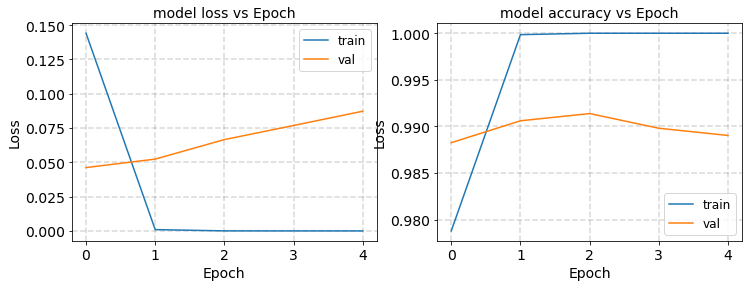

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0686 - accuracy: 0.9888 - val_loss: 0.0614 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 4s - loss: 8.5419e-04 - accuracy: 0.9997 - val_loss: 0.0591 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 1.1020e-05 - accuracy: 1.0000 - val_loss: 0.0667 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 4s - loss: 2.9178e-06 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 1.1982e-06 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9930


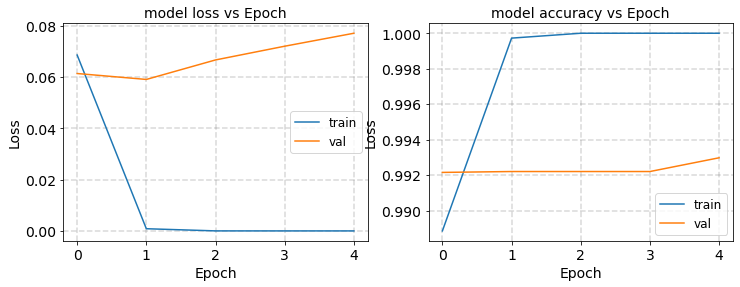

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0706 - accuracy: 0.9911 - val_loss: 0.0239 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 3s - loss: 3.3986e-04 - accuracy: 0.9999 - val_loss: 0.0267 - val_accuracy: 0.9960
Epoch 3/5
1250/1250 - 3s - loss: 9.3891e-06 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 3s - loss: 2.3025e-06 - accuracy: 1.0000 - val_loss: 0.0343 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 3s - loss: 7.2045e-07 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9952


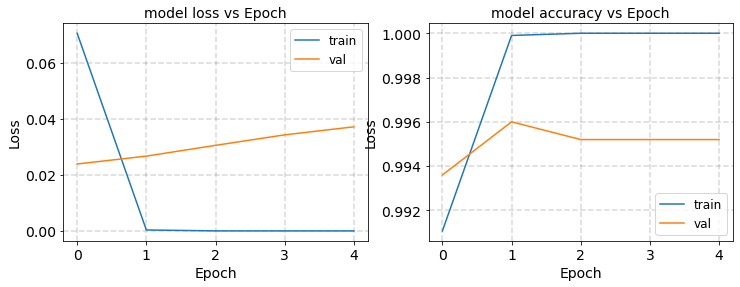

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1077 - accuracy: 0.9918 - val_loss: 0.0585 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 5.0030e-04 - accuracy: 0.9998 - val_loss: 0.0812 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 1.1654e-05 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 1.9393e-06 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 6.2743e-07 - accuracy: 1.0000 - val_loss: 0.1213 - val_accuracy: 0.9890


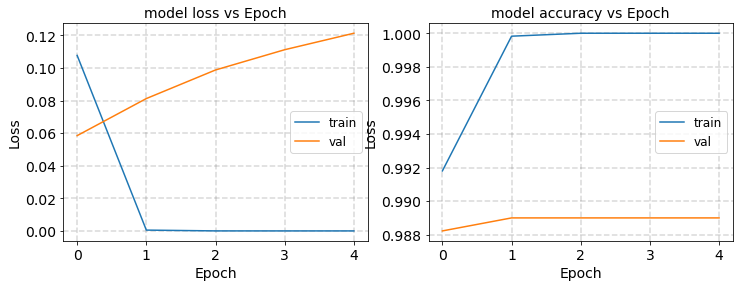

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_73 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_74 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_75 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_77 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

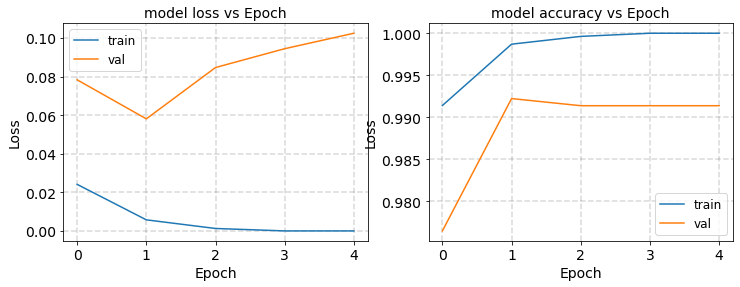

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0577 - accuracy: 0.9907 - val_loss: 0.0422 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0260 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0445 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0663 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 3.4861e-06 - accuracy: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9930


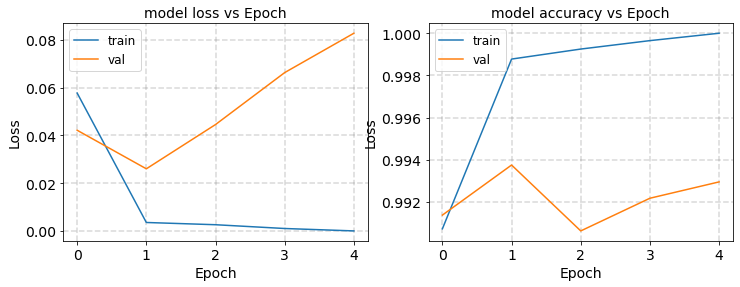

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0710 - accuracy: 0.9917 - val_loss: 0.0397 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0452 - val_accuracy: 0.9952
Epoch 3/5
1250/1250 - 3s - loss: 1.9390e-06 - accuracy: 1.0000 - val_loss: 0.0537 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 3s - loss: 3.0720e-07 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 3s - loss: 1.0351e-07 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9952


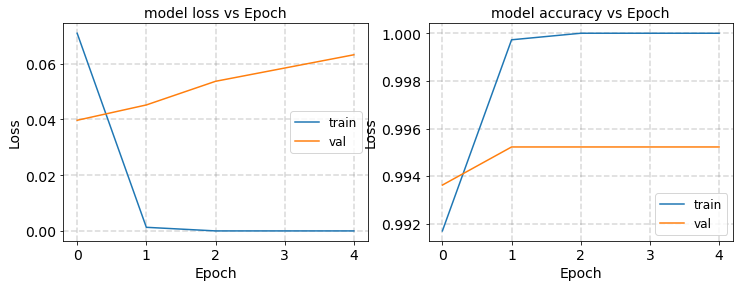

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0704 - accuracy: 0.9860 - val_loss: 0.0428 - val_accuracy: 0.9945
Epoch 2/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0770 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 3s - loss: 2.5768e-04 - accuracy: 0.9999 - val_loss: 0.1001 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 1.0007e-05 - accuracy: 1.0000 - val_loss: 0.1285 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 3.2123e-07 - accuracy: 1.0000 - val_loss: 0.1384 - val_accuracy: 0.9937


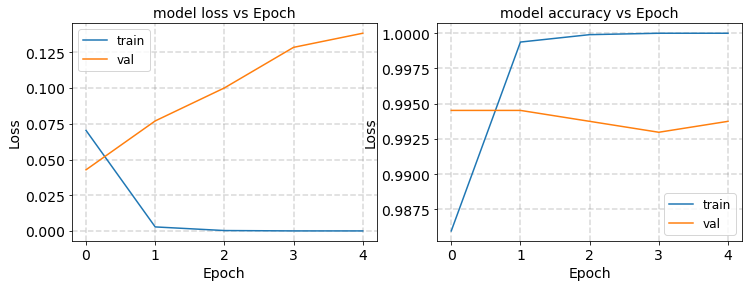

round1 [2 4 6 7]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.0782 - accuracy: 0.9884 - val_loss: 0.0414 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 2.0989e-05 - accuracy: 1.0000 - val_loss: 0.0664 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 3.9141e-07 - accuracy: 1.0000 - val_loss: 0.0814 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 7.0859e-08 - accuracy: 1.0000 - val_loss: 0.0896 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 2.4674e-08 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9913


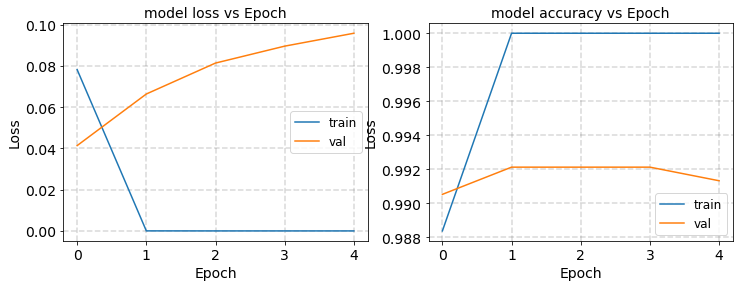

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0682 - accuracy: 0.9888 - val_loss: 0.0313 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0437 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 2.6517e-04 - accuracy: 0.9999 - val_loss: 0.0742 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 5.8498e-05 - accuracy: 1.0000 - val_loss: 0.0854 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 7.5827e-06 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9922


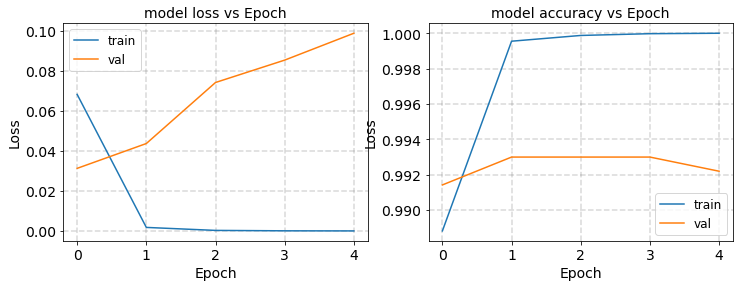

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0755 - accuracy: 0.9922 - val_loss: 0.0285 - val_accuracy: 0.9944
Epoch 2/5
1250/1250 - 3s - loss: 5.8923e-04 - accuracy: 0.9998 - val_loss: 0.0439 - val_accuracy: 0.9952
Epoch 3/5
1250/1250 - 3s - loss: 7.9096e-06 - accuracy: 1.0000 - val_loss: 0.0543 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 1.9691e-06 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 3s - loss: 2.5640e-07 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9944


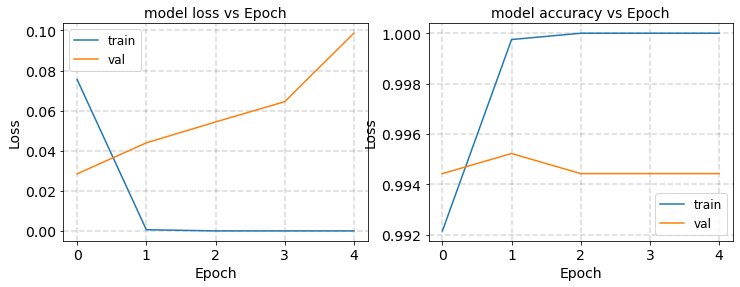

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1231 - accuracy: 0.9912 - val_loss: 0.0590 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 8.6250e-04 - accuracy: 0.9998 - val_loss: 0.0736 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 8.5684e-07 - accuracy: 1.0000 - val_loss: 0.1049 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 5.3268e-08 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 1.7274e-08 - accuracy: 1.0000 - val_loss: 0.1241 - val_accuracy: 0.9930


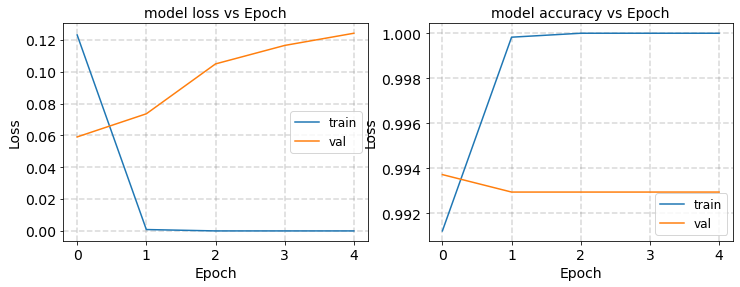

round2 [2 4 6 7]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.1669 - accuracy: 0.9859 - val_loss: 0.0532 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0570 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 4.3750e-04 - accuracy: 0.9999 - val_loss: 0.0827 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 3s - loss: 8.6958e-06 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 3s - loss: 3.2842e-06 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9867


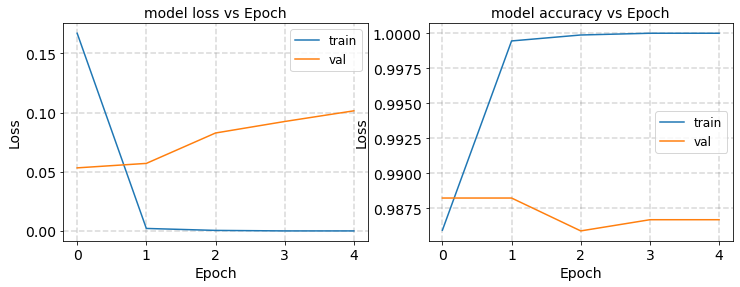

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0616 - accuracy: 0.9893 - val_loss: 0.0485 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 1.4673e-04 - accuracy: 0.9999 - val_loss: 0.0784 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 2.3543e-06 - accuracy: 1.0000 - val_loss: 0.0886 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 4s - loss: 5.6631e-07 - accuracy: 1.0000 - val_loss: 0.0984 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 2.0202e-07 - accuracy: 1.0000 - val_loss: 0.1042 - val_accuracy: 0.9922


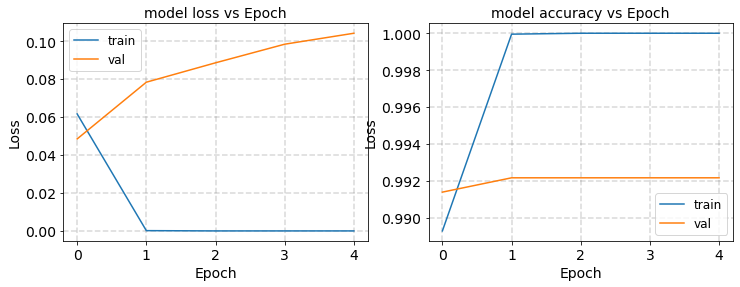

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0958 - accuracy: 0.9906 - val_loss: 0.0291 - val_accuracy: 0.9944
Epoch 2/5
1250/1250 - 4s - loss: 2.1447e-04 - accuracy: 0.9999 - val_loss: 0.0419 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 4s - loss: 1.5606e-05 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 5.2762e-06 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 1.9042e-06 - accuracy: 1.0000 - val_loss: 0.0598 - val_accuracy: 0.9929


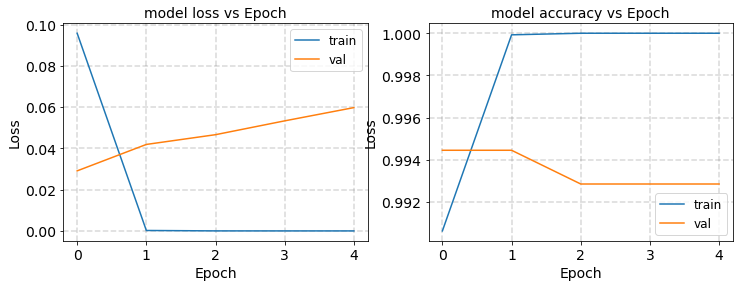

7
Epoch 1/5
1250/1250 - 5s - loss: 0.0900 - accuracy: 0.9903 - val_loss: 0.0395 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 4s - loss: 7.6645e-05 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 5.3114e-06 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 5s - loss: 8.9459e-07 - accuracy: 1.0000 - val_loss: 0.0807 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 3.1053e-07 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy: 0.9922


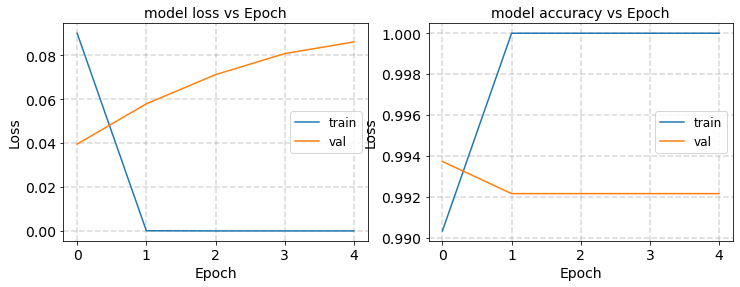

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_79 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_80 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_81 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_83 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

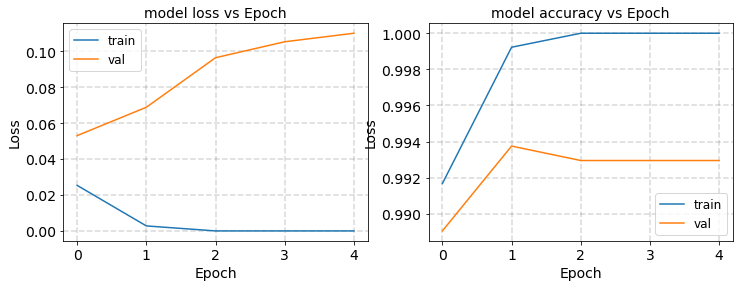

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0569 - accuracy: 0.9912 - val_loss: 0.0529 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0460 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 2.6387e-05 - accuracy: 1.0000 - val_loss: 0.0733 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 2.2334e-06 - accuracy: 1.0000 - val_loss: 0.0803 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 6.7441e-07 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9922


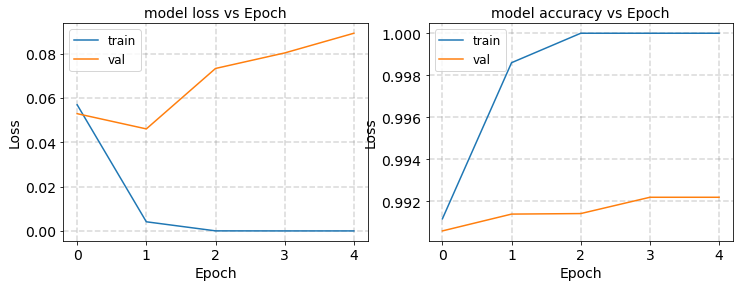

6
Epoch 1/5
1250/1250 - 3s - loss: 0.1098 - accuracy: 0.9907 - val_loss: 0.0311 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 1.2529e-04 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 3s - loss: 5.8944e-06 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 1.7287e-06 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 4s - loss: 5.8119e-07 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9944


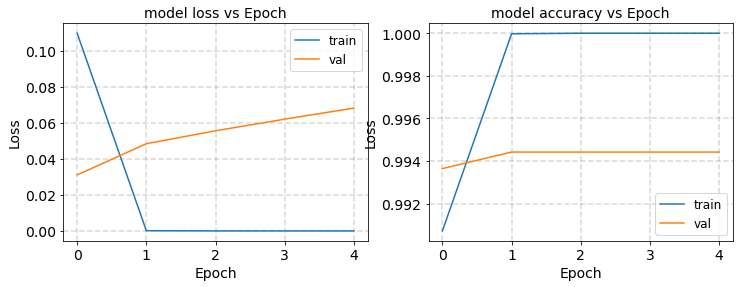

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0805 - accuracy: 0.9876 - val_loss: 0.0434 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 4s - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0512 - val_accuracy: 0.9907
Epoch 3/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0684 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 4s - loss: 2.1986e-05 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 2.8491e-06 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9930


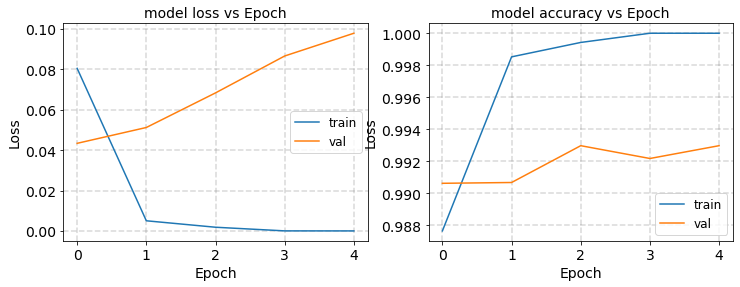

round1 [7 2 4 6]
7
Epoch 1/5
1250/1250 - 4s - loss: 0.0813 - accuracy: 0.9905 - val_loss: 0.0387 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0563 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 1.7128e-04 - accuracy: 1.0000 - val_loss: 0.0648 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 2.2529e-06 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 8.1129e-07 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9930


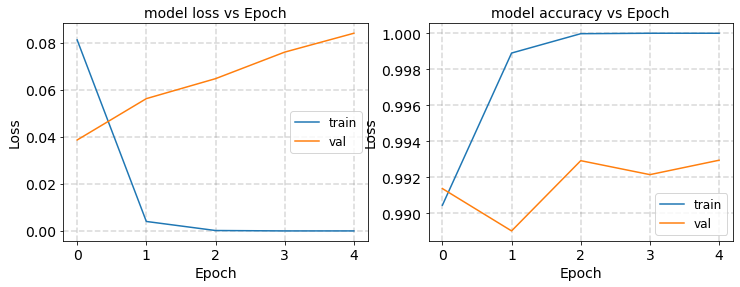

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1187 - accuracy: 0.9852 - val_loss: 0.0736 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0478 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 1.1244e-04 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 1.3440e-06 - accuracy: 1.0000 - val_loss: 0.1098 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 3.0214e-07 - accuracy: 1.0000 - val_loss: 0.1202 - val_accuracy: 0.9890


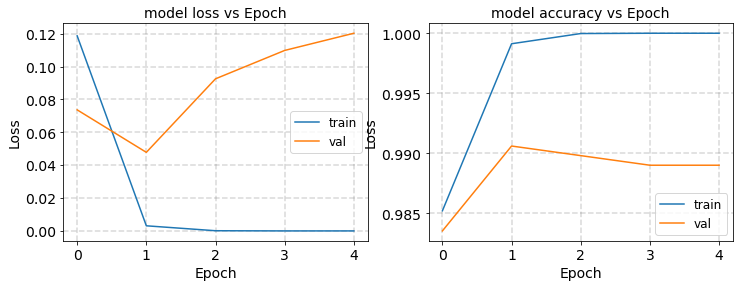

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0909 - accuracy: 0.9879 - val_loss: 0.0721 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 4s - loss: 8.4350e-04 - accuracy: 0.9998 - val_loss: 0.1312 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1313 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 5s - loss: 9.4817e-06 - accuracy: 1.0000 - val_loss: 0.1480 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 4s - loss: 3.0910e-06 - accuracy: 1.0000 - val_loss: 0.1604 - val_accuracy: 0.9875


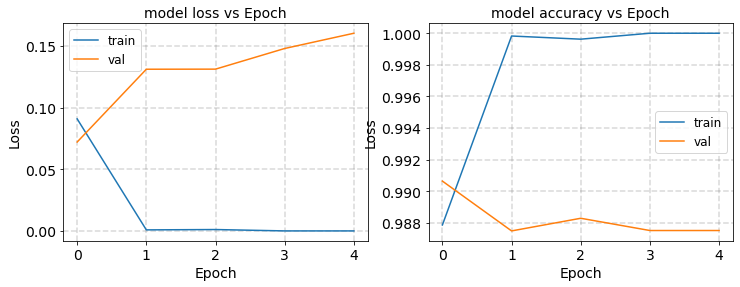

6
Epoch 1/5
1250/1250 - 5s - loss: 0.0675 - accuracy: 0.9862 - val_loss: 0.0562 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0534 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 3.5983e-04 - accuracy: 0.9999 - val_loss: 0.0783 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 1.4552e-05 - accuracy: 1.0000 - val_loss: 0.0888 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 5s - loss: 4.8177e-06 - accuracy: 1.0000 - val_loss: 0.0992 - val_accuracy: 0.9913


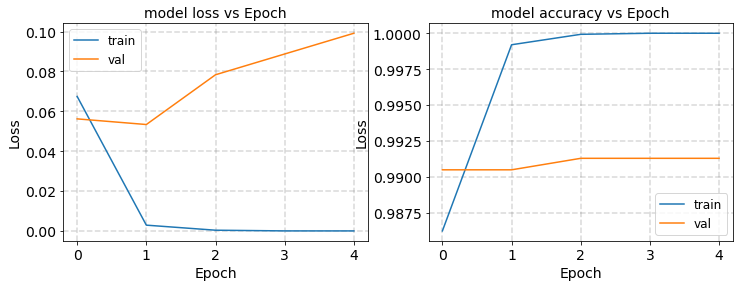

round2 [2 6 7 4]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.0931 - accuracy: 0.9857 - val_loss: 0.0610 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0716 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0723 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1140 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.1314 - val_accuracy: 0.9883


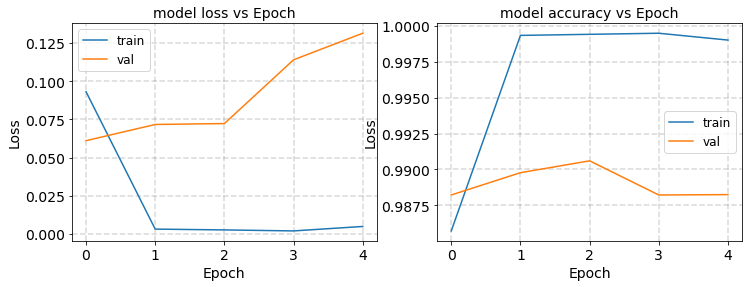

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0791 - accuracy: 0.9919 - val_loss: 0.0537 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 4s - loss: 4.3921e-04 - accuracy: 0.9998 - val_loss: 0.0762 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 1.8744e-05 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 4.0106e-06 - accuracy: 1.0000 - val_loss: 0.0993 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 1.3922e-06 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 0.9905


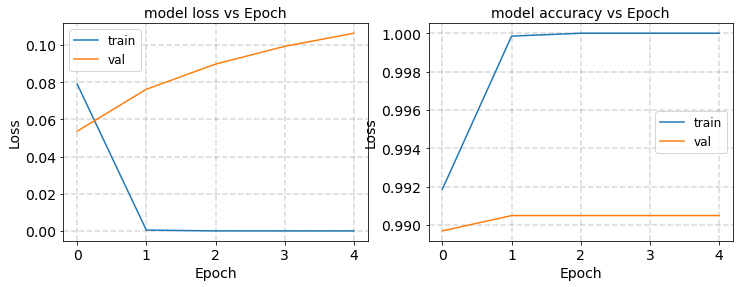

7
Epoch 1/5
1250/1250 - 4s - loss: 0.1086 - accuracy: 0.9908 - val_loss: 0.0710 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 5.2772e-04 - accuracy: 0.9998 - val_loss: 0.0928 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 2.1440e-05 - accuracy: 1.0000 - val_loss: 0.1080 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 6.6981e-06 - accuracy: 1.0000 - val_loss: 0.1163 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 2.5939e-06 - accuracy: 1.0000 - val_loss: 0.1268 - val_accuracy: 0.9906


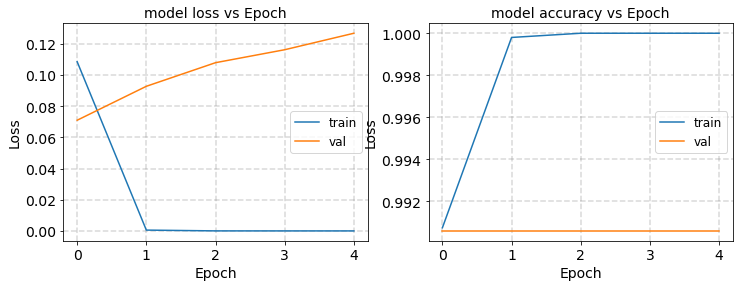

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0929 - accuracy: 0.9855 - val_loss: 0.0781 - val_accuracy: 0.9868
Epoch 2/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.1151 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1499 - val_accuracy: 0.9860
Epoch 4/5
1250/1250 - 3s - loss: 4.4870e-05 - accuracy: 1.0000 - val_loss: 0.1797 - val_accuracy: 0.9868
Epoch 5/5
1250/1250 - 3s - loss: 1.4132e-06 - accuracy: 1.0000 - val_loss: 0.2257 - val_accuracy: 0.9875


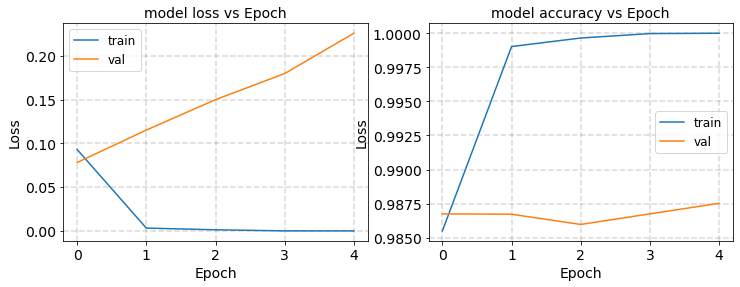

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_85 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_86 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_87 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_89 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

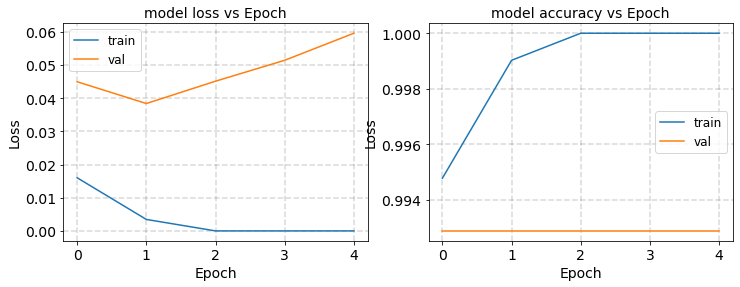

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0464 - accuracy: 0.9900 - val_loss: 0.0441 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0641 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 1.9713e-06 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 1.9437e-07 - accuracy: 1.0000 - val_loss: 0.1149 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 6.0262e-08 - accuracy: 1.0000 - val_loss: 0.1262 - val_accuracy: 0.9898


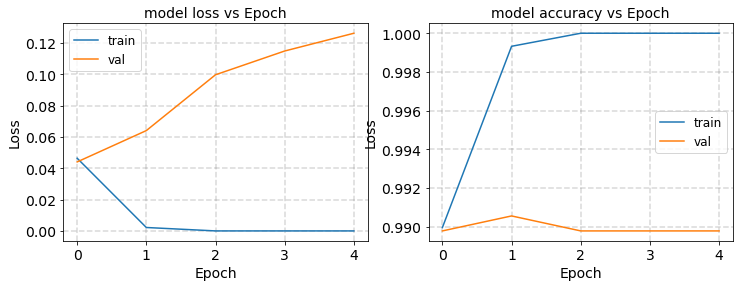

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0852 - accuracy: 0.9862 - val_loss: 0.0433 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0693 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0441 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0248 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 5s - loss: 1.2307e-04 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9930


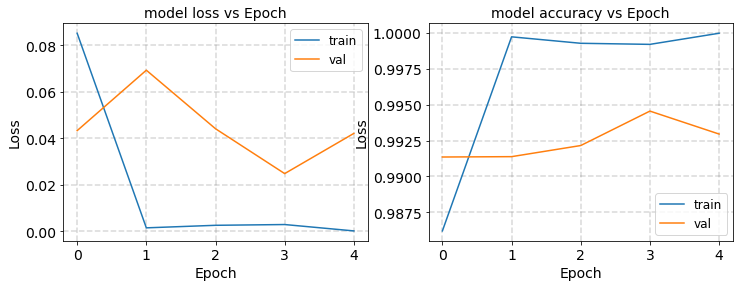

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0453 - accuracy: 0.9927 - val_loss: 0.0294 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0370 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0456 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 6.3268e-06 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 0.9938
Epoch 5/5
1250/1250 - 3s - loss: 6.3217e-07 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9938


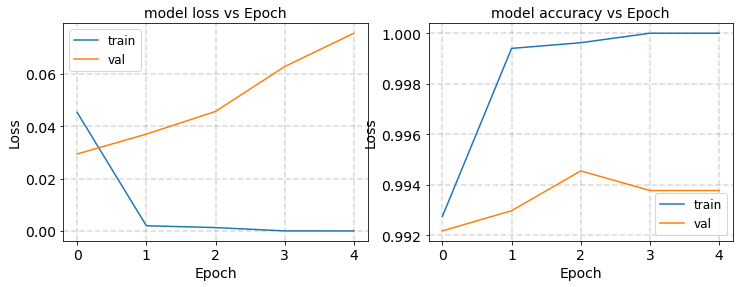

round1 [7 2 6 4]
7
Epoch 1/5
1250/1250 - 3s - loss: 1.4290e-07 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9938
Epoch 2/5
1250/1250 - 3s - loss: 5.2961e-08 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9938
Epoch 3/5
1250/1250 - 3s - loss: 2.4089e-08 - accuracy: 1.0000 - val_loss: 0.0929 - val_accuracy: 0.9938
Epoch 4/5
1250/1250 - 3s - loss: 1.2265e-08 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 0.9938
Epoch 5/5
1250/1250 - 3s - loss: 6.7935e-09 - accuracy: 1.0000 - val_loss: 0.1002 - val_accuracy: 0.9938


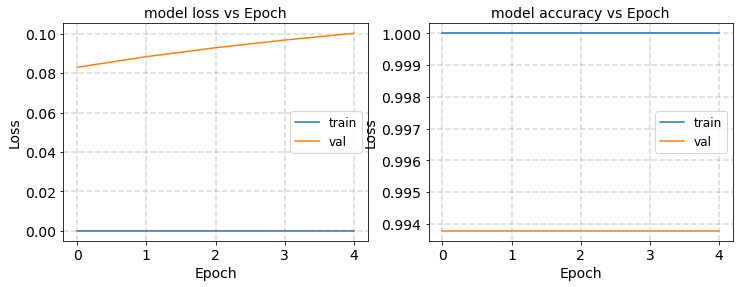

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1206 - accuracy: 0.9920 - val_loss: 0.1053 - val_accuracy: 0.9764
Epoch 2/5
1250/1250 - 3s - loss: 5.6368e-04 - accuracy: 0.9998 - val_loss: 0.0786 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 3s - loss: 1.1455e-05 - accuracy: 1.0000 - val_loss: 0.0905 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 3s - loss: 3.5274e-06 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 1.3757e-06 - accuracy: 1.0000 - val_loss: 0.1098 - val_accuracy: 0.9889


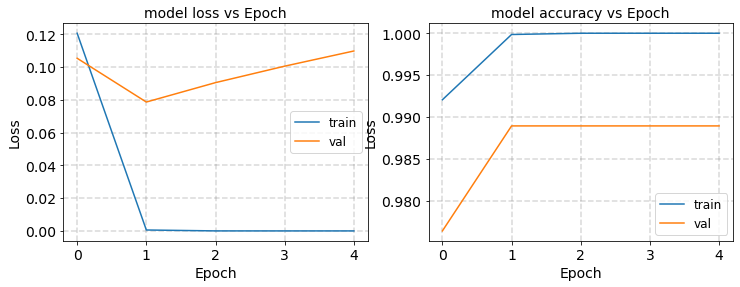

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0723 - accuracy: 0.9915 - val_loss: 0.0373 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 2.6782e-05 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 5.3904e-06 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 1.3849e-06 - accuracy: 1.0000 - val_loss: 0.0802 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 9.6775e-08 - accuracy: 1.0000 - val_loss: 0.0886 - val_accuracy: 0.9929


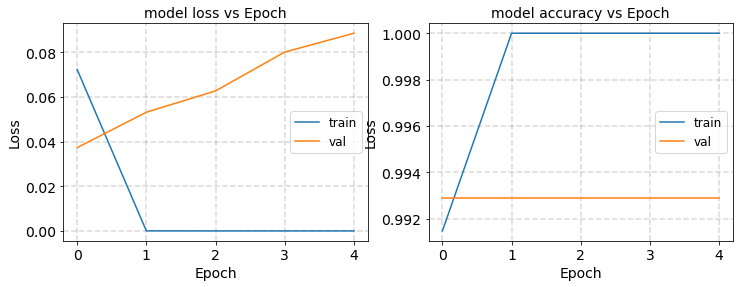

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0985 - accuracy: 0.9905 - val_loss: 0.0374 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0519 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 3.3239e-05 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 3.8041e-06 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.1219e-06 - accuracy: 1.0000 - val_loss: 0.0836 - val_accuracy: 0.9898


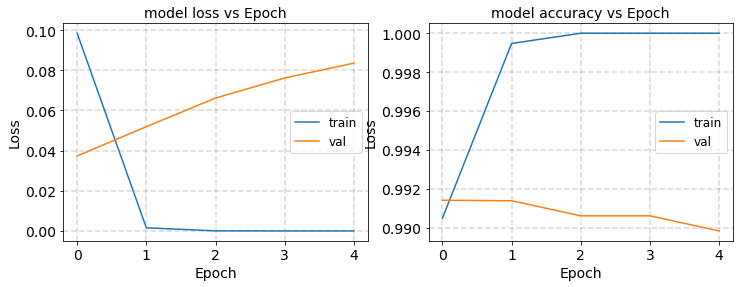

round2 [7 6 4 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.1276 - accuracy: 0.9876 - val_loss: 0.0422 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0626 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 4.1826e-04 - accuracy: 0.9999 - val_loss: 0.0777 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0649 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 4s - loss: 6.9190e-05 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9937


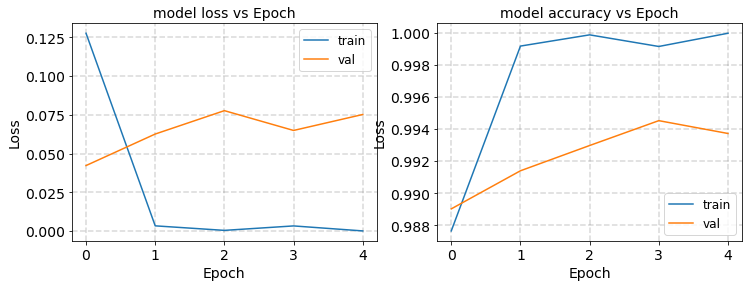

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0823 - accuracy: 0.9896 - val_loss: 0.0291 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0439 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 5s - loss: 9.4856e-06 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 7.4143e-07 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 2.0812e-07 - accuracy: 1.0000 - val_loss: 0.0863 - val_accuracy: 0.9937


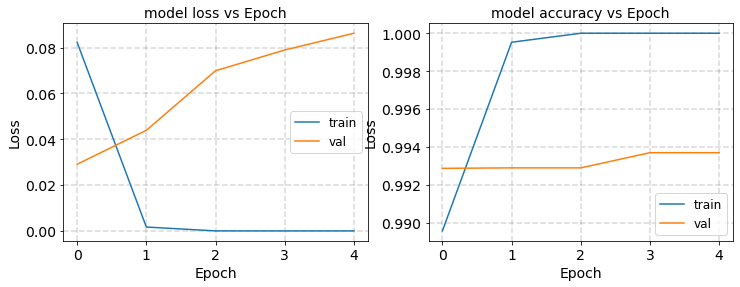

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0766 - accuracy: 0.9915 - val_loss: 0.0627 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 8.2933e-04 - accuracy: 0.9998 - val_loss: 0.1011 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 1.4893e-04 - accuracy: 0.9999 - val_loss: 0.1221 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 3.4701e-05 - accuracy: 1.0000 - val_loss: 0.1524 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 2.2078e-06 - accuracy: 1.0000 - val_loss: 0.1637 - val_accuracy: 0.9898


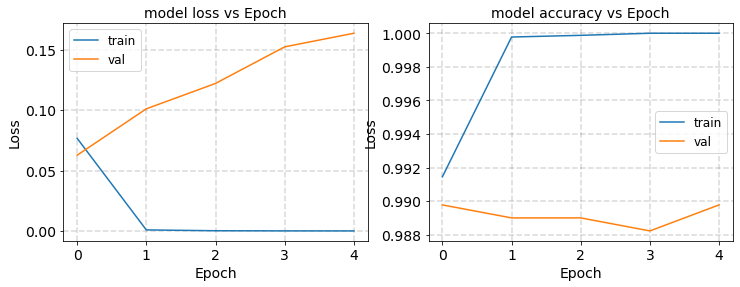

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0859 - accuracy: 0.9913 - val_loss: 0.0561 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 5.2685e-04 - accuracy: 0.9999 - val_loss: 0.0751 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 1.1179e-05 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 2.7413e-06 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 8.7721e-07 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9921


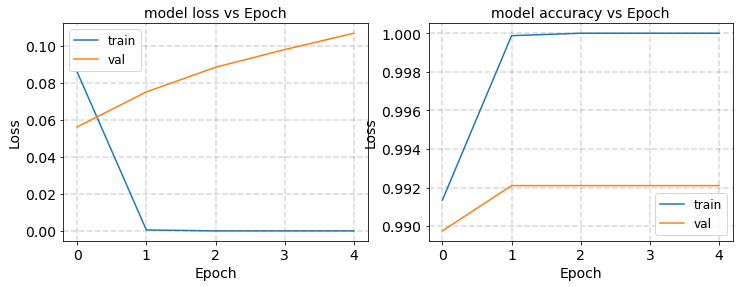

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_91 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_92 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_93 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_95 (Dense)             (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

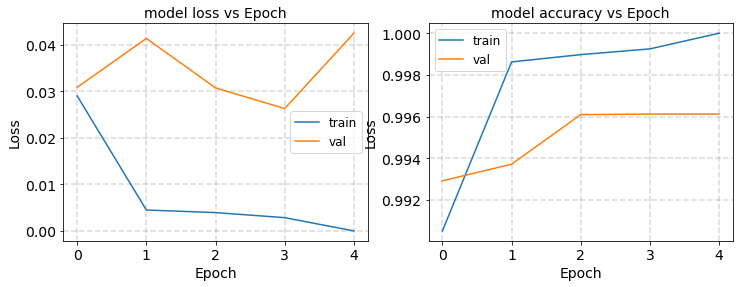

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0736 - accuracy: 0.9912 - val_loss: 0.0345 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0277 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 3s - loss: 7.7693e-06 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 1.2865e-06 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 2.6844e-07 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 0.9945


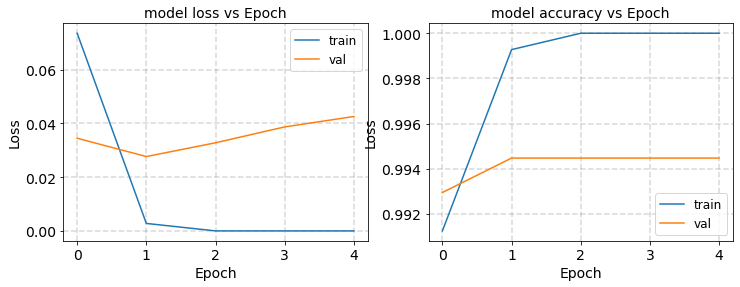

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0654 - accuracy: 0.9925 - val_loss: 0.0557 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 4.9441e-05 - accuracy: 1.0000 - val_loss: 0.0403 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 3s - loss: 4.1581e-06 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 1.4039e-06 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 3s - loss: 5.5913e-07 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9952


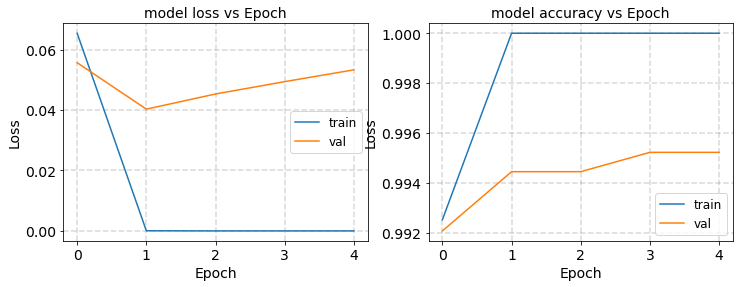

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0580 - accuracy: 0.9918 - val_loss: 0.0421 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0484 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 1.4879e-05 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 3.5893e-06 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 1.0811e-06 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9930


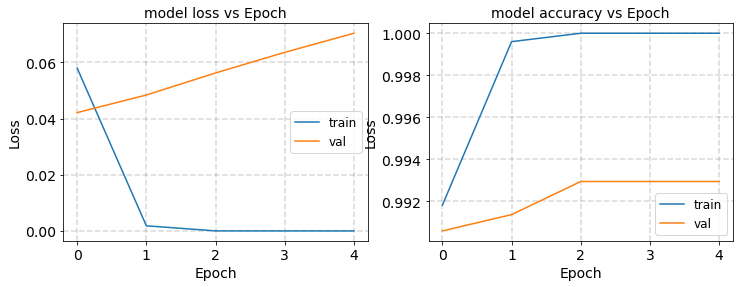

round1 [6 4 7 2]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0712 - accuracy: 0.9877 - val_loss: 0.0460 - val_accuracy: 0.9920
Epoch 2/5
1250/1250 - 3s - loss: 9.9655e-05 - accuracy: 1.0000 - val_loss: 0.0639 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 3s - loss: 9.0373e-06 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 3s - loss: 1.0657e-06 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 3s - loss: 1.4996e-07 - accuracy: 1.0000 - val_loss: 0.1036 - val_accuracy: 0.9936


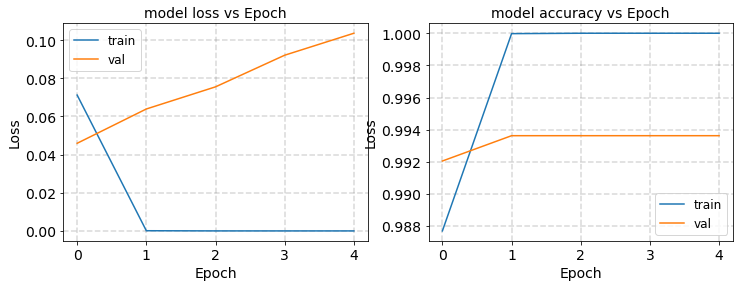

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0892 - accuracy: 0.9884 - val_loss: 0.0341 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0330 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 4.9466e-04 - accuracy: 0.9999 - val_loss: 0.0494 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 7.4434e-06 - accuracy: 1.0000 - val_loss: 0.0515 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 1.2472e-06 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 0.9929


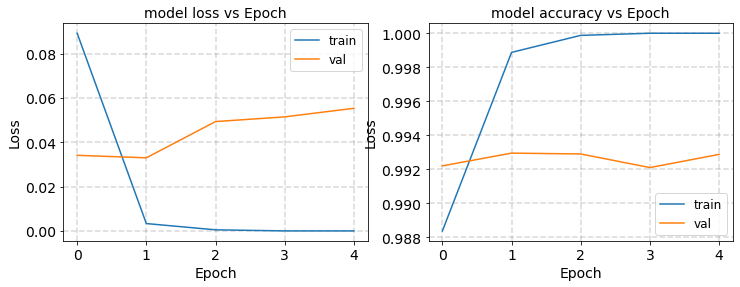

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0693 - accuracy: 0.9914 - val_loss: 0.0357 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0368 - val_accuracy: 0.9969
Epoch 3/5
1250/1250 - 4s - loss: 1.3979e-05 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 0.9961
Epoch 4/5
1250/1250 - 4s - loss: 3.4724e-06 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 0.9969
Epoch 5/5
1250/1250 - 4s - loss: 1.0799e-06 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 0.9961


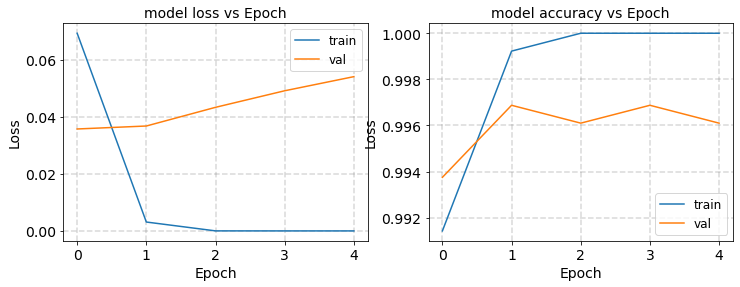

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1196 - accuracy: 0.9886 - val_loss: 0.0694 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 4s - loss: 6.5834e-04 - accuracy: 0.9999 - val_loss: 0.0559 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 1.7166e-05 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 6.1031e-06 - accuracy: 1.0000 - val_loss: 0.0651 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 2.2897e-06 - accuracy: 1.0000 - val_loss: 0.0730 - val_accuracy: 0.9913


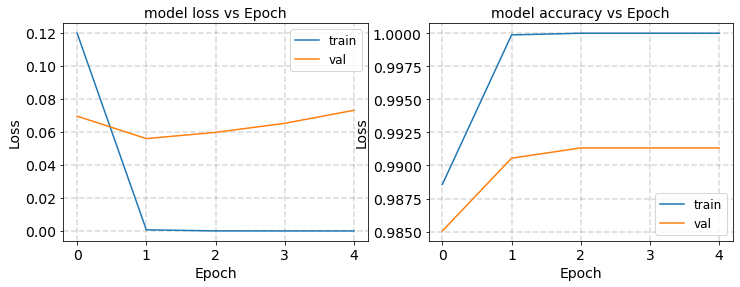

round2 [6 2 7 4]
6
Epoch 1/5
1250/1250 - 4s - loss: 0.0462 - accuracy: 0.9952 - val_loss: 0.0342 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 3s - loss: 2.3430e-05 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 4s - loss: 3.0077e-06 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 4s - loss: 1.0002e-06 - accuracy: 1.0000 - val_loss: 0.0602 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 4s - loss: 4.1188e-07 - accuracy: 1.0000 - val_loss: 0.0655 - val_accuracy: 0.9936


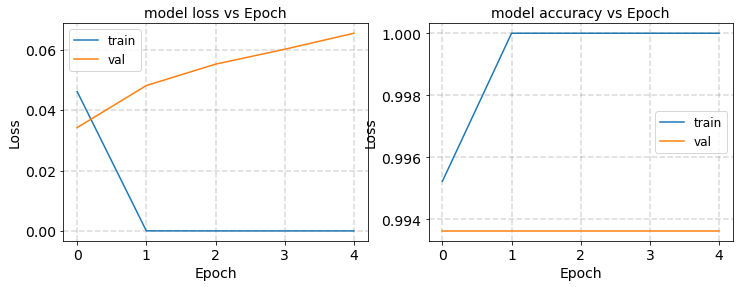

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0910 - accuracy: 0.9862 - val_loss: 0.0491 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0559 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 4s - loss: 5.6923e-05 - accuracy: 1.0000 - val_loss: 0.0951 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 5.7269e-06 - accuracy: 1.0000 - val_loss: 0.1083 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 1.7110e-06 - accuracy: 1.0000 - val_loss: 0.1190 - val_accuracy: 0.9898


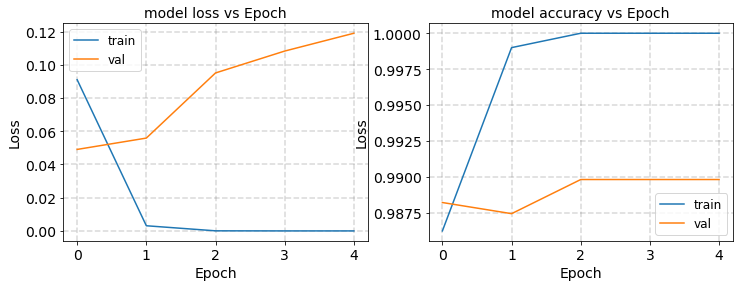

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0789 - accuracy: 0.9919 - val_loss: 0.0381 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0271 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 7.9370e-04 - accuracy: 0.9997 - val_loss: 0.0326 - val_accuracy: 0.9938
Epoch 4/5
1250/1250 - 3s - loss: 2.6253e-05 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 0.9938
Epoch 5/5
1250/1250 - 3s - loss: 7.1193e-06 - accuracy: 1.0000 - val_loss: 0.0388 - val_accuracy: 0.9938


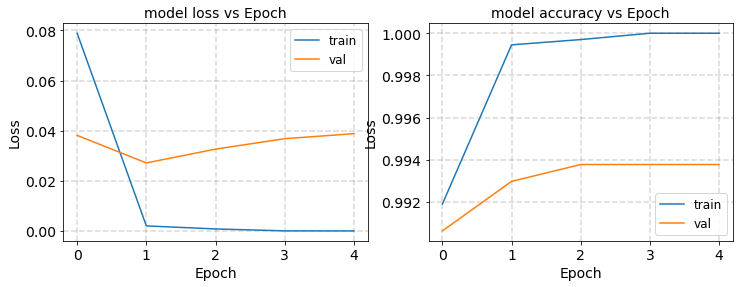

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0676 - accuracy: 0.9887 - val_loss: 0.0417 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0577 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0522 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 7.7760e-04 - accuracy: 0.9998 - val_loss: 0.0487 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.3911e-05 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9937


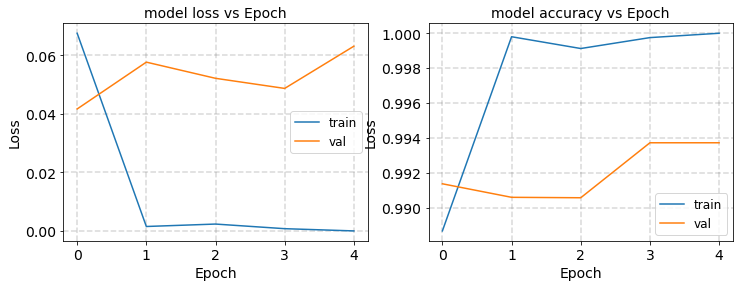

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_97 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_98 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_99 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_101 (Dense)            (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

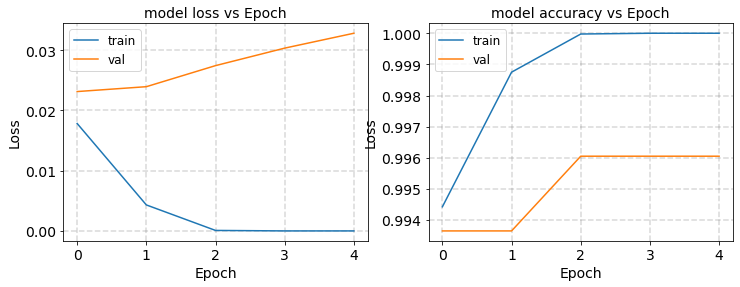

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0589 - accuracy: 0.9913 - val_loss: 0.0235 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0270 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0362 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 4s - loss: 6.2008e-04 - accuracy: 0.9998 - val_loss: 0.0473 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 4s - loss: 1.0608e-06 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9953


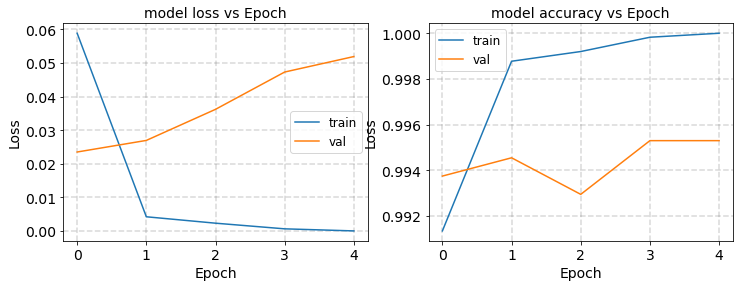

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0806 - accuracy: 0.9888 - val_loss: 0.0398 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0655 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 1.2054e-04 - accuracy: 0.9999 - val_loss: 0.0949 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 1.6761e-06 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 4.8274e-07 - accuracy: 1.0000 - val_loss: 0.1184 - val_accuracy: 0.9898


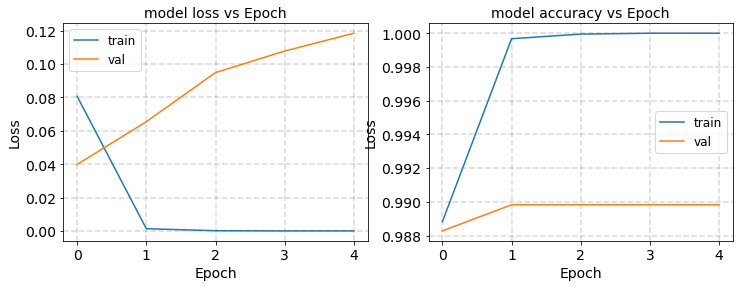

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0655 - accuracy: 0.9877 - val_loss: 0.0375 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 4s - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0633 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0415 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 1.3395e-05 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 6.4300e-07 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9914


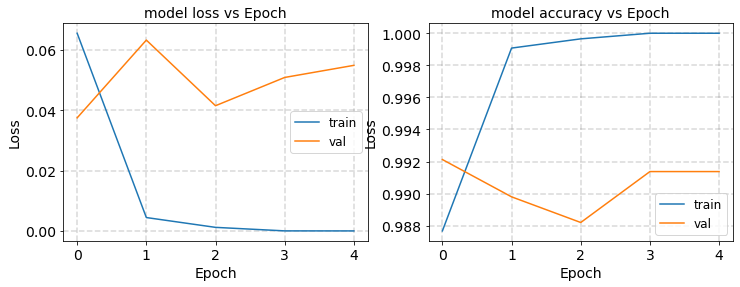

round1 [4 6 7 2]
4
Epoch 1/5
1250/1250 - 4s - loss: 2.4744e-07 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 1.0872e-07 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 5.0487e-08 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 2.4552e-08 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 1.2154e-08 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9913


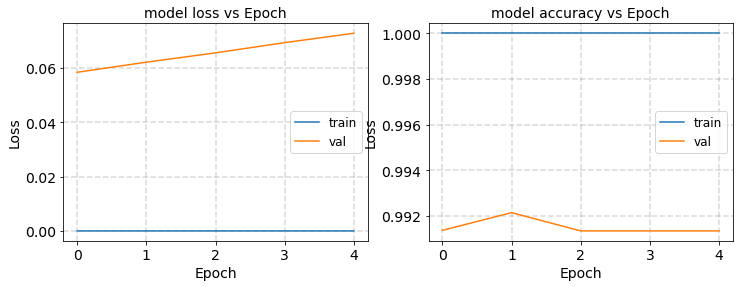

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0759 - accuracy: 0.9927 - val_loss: 0.0320 - val_accuracy: 0.9945
Epoch 2/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0324 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 4s - loss: 3.3509e-04 - accuracy: 0.9999 - val_loss: 0.0515 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 6.1717e-06 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 3s - loss: 2.0212e-06 - accuracy: 1.0000 - val_loss: 0.0641 - val_accuracy: 0.9944


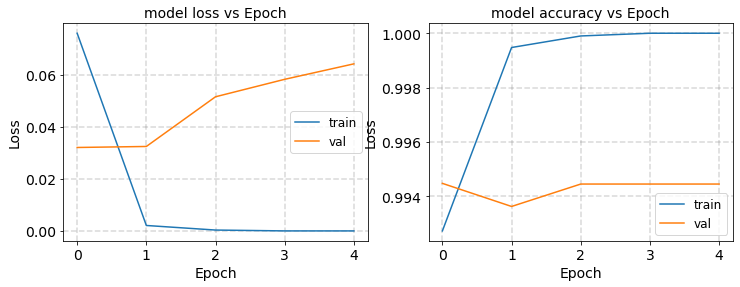

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0911 - accuracy: 0.9935 - val_loss: 0.0324 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 4s - loss: 6.2934e-04 - accuracy: 0.9998 - val_loss: 0.0541 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 4s - loss: 1.4140e-05 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 4s - loss: 4.0557e-06 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 1.6211e-06 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9914


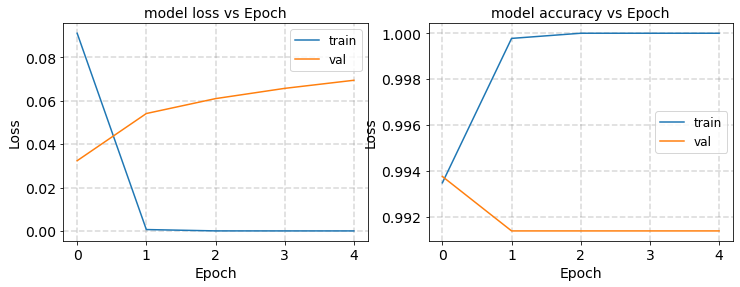

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0768 - accuracy: 0.9879 - val_loss: 0.0582 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0855 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 4s - loss: 1.4635e-05 - accuracy: 1.0000 - val_loss: 0.1299 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 4s - loss: 3.8337e-07 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 3s - loss: 1.1056e-07 - accuracy: 1.0000 - val_loss: 0.1647 - val_accuracy: 0.9875


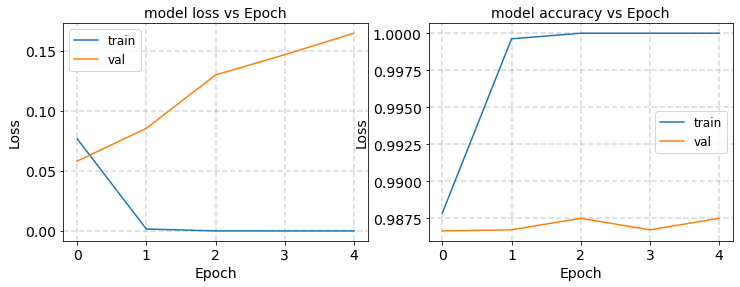

round2 [6 2 7 4]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0801 - accuracy: 0.9900 - val_loss: 0.0266 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 2.1232e-04 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 4.4479e-06 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 3s - loss: 7.9113e-07 - accuracy: 1.0000 - val_loss: 0.0467 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 3s - loss: 2.7714e-07 - accuracy: 1.0000 - val_loss: 0.0514 - val_accuracy: 0.9920


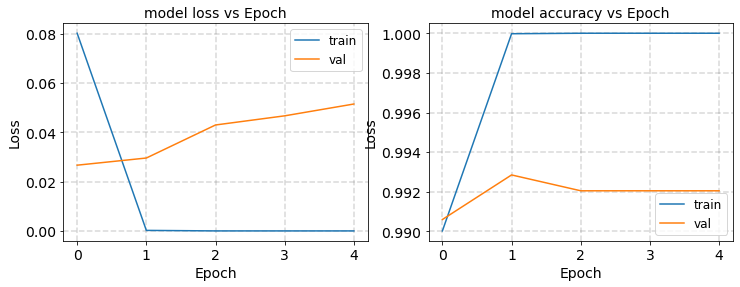

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1154 - accuracy: 0.9827 - val_loss: 0.0455 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 1.3828e-04 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 2.0260e-05 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 4.2309e-06 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 1.0301e-06 - accuracy: 1.0000 - val_loss: 0.1118 - val_accuracy: 0.9875


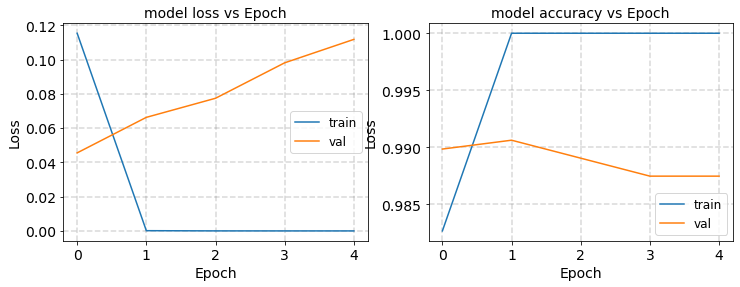

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1034 - accuracy: 0.9839 - val_loss: 0.0220 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0342 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0397 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 3.4529e-04 - accuracy: 0.9999 - val_loss: 0.0692 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 3.0365e-06 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9930


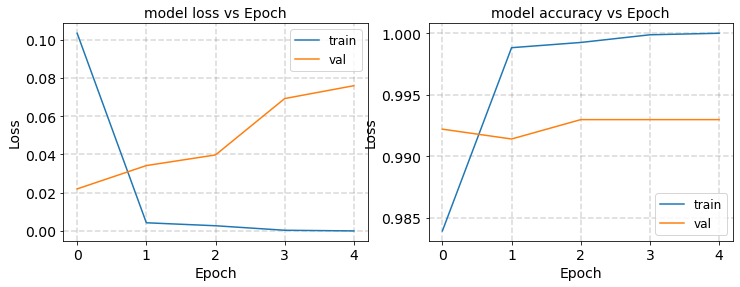

4
Epoch 1/5
1250/1250 - 3s - loss: 0.1945 - accuracy: 0.9453 - val_loss: 0.0699 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0935 - val_accuracy: 0.9836
Epoch 3/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.1013 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.1076 - val_accuracy: 0.9876
Epoch 5/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1131 - val_accuracy: 0.9875


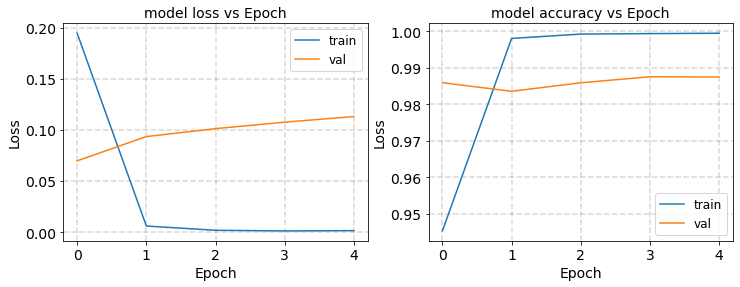

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_103 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_104 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_105 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_107 (Dense)            (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

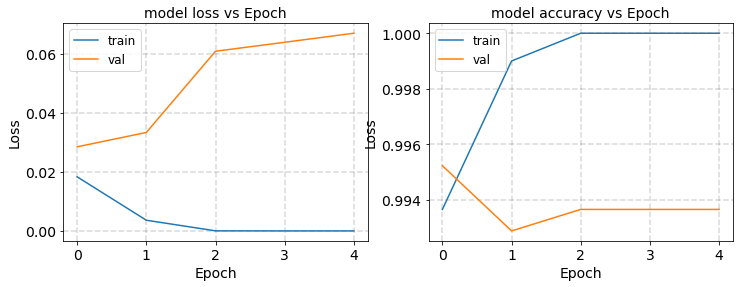

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0639 - accuracy: 0.9874 - val_loss: 0.0166 - val_accuracy: 0.9953
Epoch 2/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0478 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 3s - loss: 6.1364e-06 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 4.3462e-07 - accuracy: 1.0000 - val_loss: 0.0640 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.1690e-07 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9929


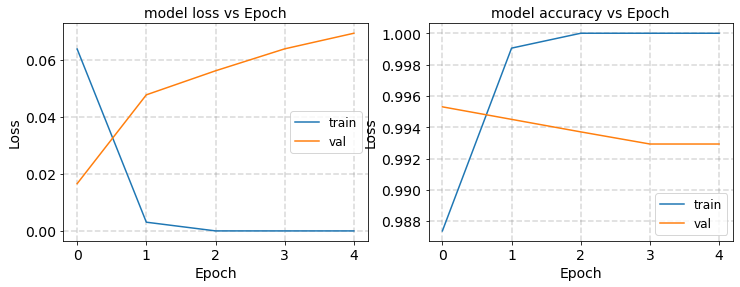

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0646 - accuracy: 0.9924 - val_loss: 0.0315 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0567 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 3s - loss: 3.0895e-06 - accuracy: 1.0000 - val_loss: 0.0708 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 5.3024e-07 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 2.0851e-07 - accuracy: 1.0000 - val_loss: 0.0825 - val_accuracy: 0.9945


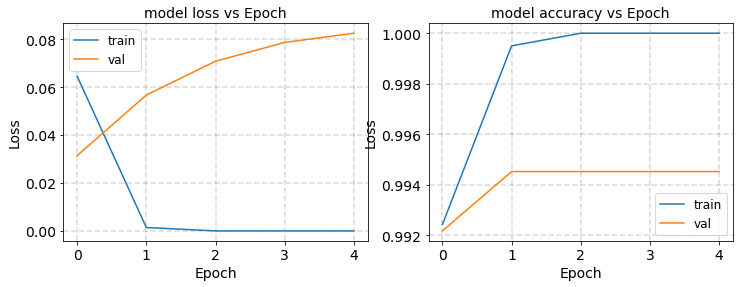

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0818 - accuracy: 0.9888 - val_loss: 0.0680 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0989 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 1.1410e-06 - accuracy: 1.0000 - val_loss: 0.1245 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 2.9793e-07 - accuracy: 1.0000 - val_loss: 0.1370 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 1.1998e-07 - accuracy: 1.0000 - val_loss: 0.1471 - val_accuracy: 0.9898


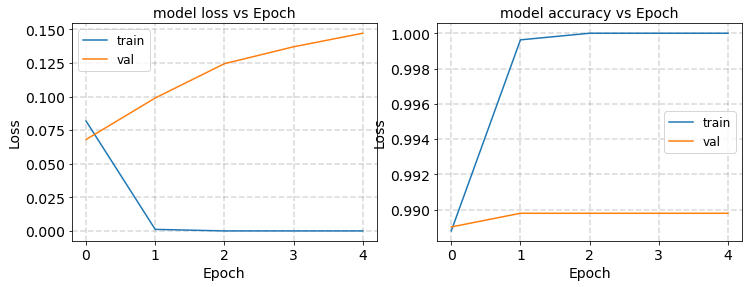

round1 [7 6 4 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0862 - accuracy: 0.9912 - val_loss: 0.0268 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0283 - val_accuracy: 0.9953
Epoch 3/5
1250/1250 - 4s - loss: 1.7718e-05 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 0.9953
Epoch 4/5
1250/1250 - 4s - loss: 1.4267e-06 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 4s - loss: 3.7235e-07 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 0.9953


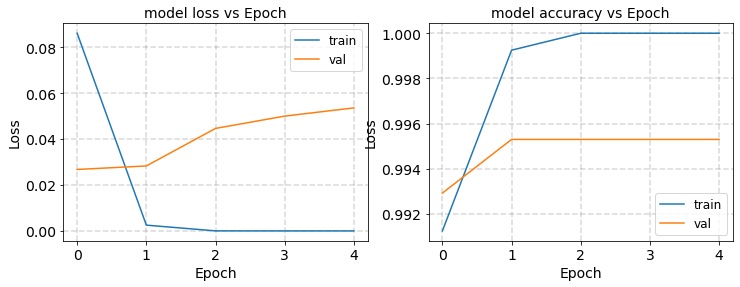

6
Epoch 1/5
1250/1250 - 4s - loss: 0.1235 - accuracy: 0.9897 - val_loss: 0.0408 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0400 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 4s - loss: 4.2403e-05 - accuracy: 1.0000 - val_loss: 0.0548 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 2.4847e-06 - accuracy: 1.0000 - val_loss: 0.0747 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 4s - loss: 4.6233e-07 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 0.9944


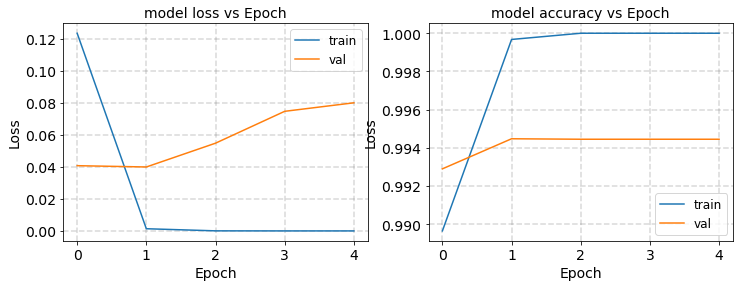

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0785 - accuracy: 0.9905 - val_loss: 0.0433 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0559 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 3.3216e-05 - accuracy: 1.0000 - val_loss: 0.0620 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 4s - loss: 3.5561e-06 - accuracy: 1.0000 - val_loss: 0.0681 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 1.3972e-06 - accuracy: 1.0000 - val_loss: 0.0739 - val_accuracy: 0.9930


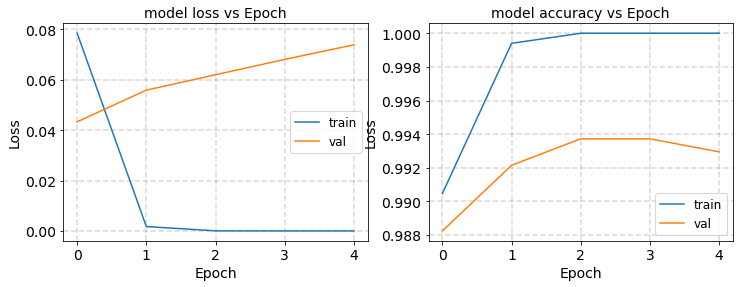

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0842 - accuracy: 0.9891 - val_loss: 0.0514 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0507 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 4s - loss: 1.3919e-05 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 4s - loss: 4.1161e-06 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 4s - loss: 1.4942e-06 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9930


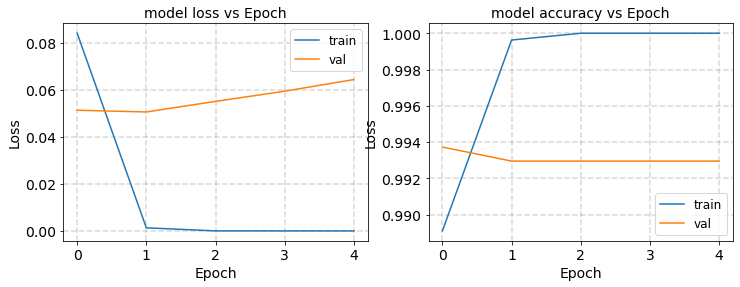

round2 [4 2 6 7]
4
Epoch 1/5
1250/1250 - 4s - loss: 0.0597 - accuracy: 0.9870 - val_loss: 0.0482 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0656 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 2.4274e-04 - accuracy: 0.9999 - val_loss: 0.0773 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 1.3316e-05 - accuracy: 1.0000 - val_loss: 0.0882 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 5.5086e-06 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 0.9898


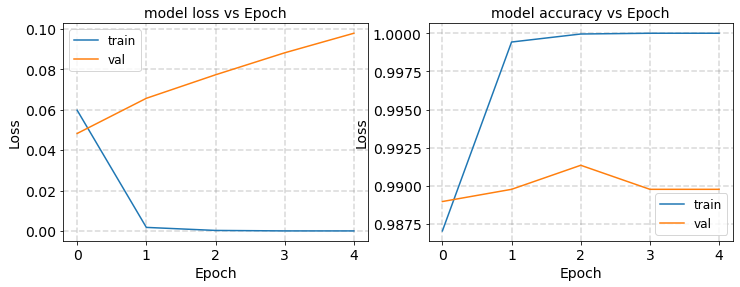

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0674 - accuracy: 0.9916 - val_loss: 0.0768 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 4s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0686 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 1.3117e-05 - accuracy: 1.0000 - val_loss: 0.0870 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 1.9386e-06 - accuracy: 1.0000 - val_loss: 0.1131 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 1.2353e-07 - accuracy: 1.0000 - val_loss: 0.1218 - val_accuracy: 0.9882


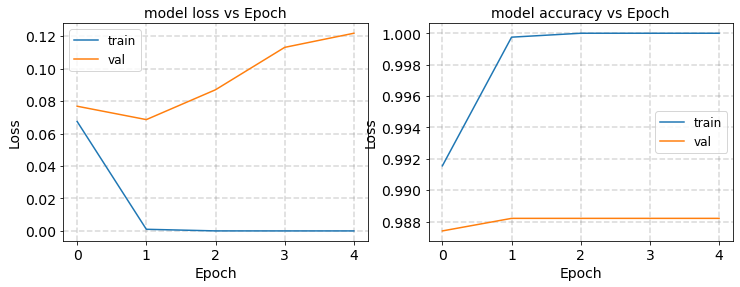

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0625 - accuracy: 0.9950 - val_loss: 0.0336 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 4s - loss: 3.3424e-04 - accuracy: 0.9999 - val_loss: 0.0619 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 2.0818e-06 - accuracy: 1.0000 - val_loss: 0.0717 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 5.6198e-07 - accuracy: 1.0000 - val_loss: 0.0780 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 1.8438e-07 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9929


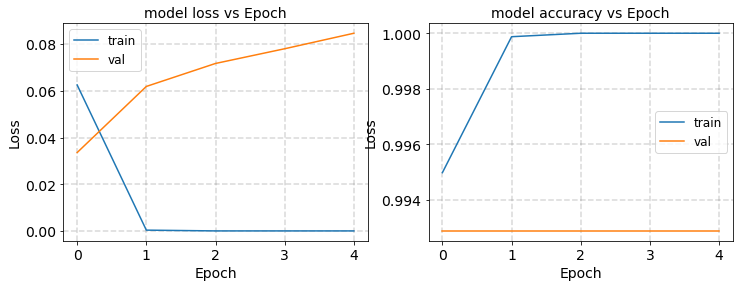

7
Epoch 1/5
1250/1250 - 4s - loss: 0.1525 - accuracy: 0.9929 - val_loss: 0.0445 - val_accuracy: 0.9945
Epoch 2/5
1250/1250 - 4s - loss: 1.9555e-04 - accuracy: 0.9999 - val_loss: 0.0793 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 4s - loss: 3.5305e-06 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 4s - loss: 1.0461e-06 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 4s - loss: 4.3847e-07 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 0.9930


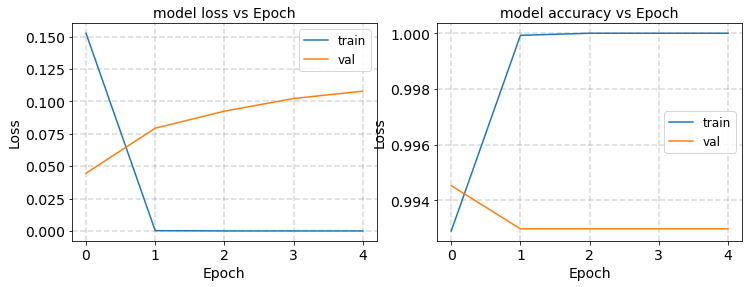

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_109 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_110 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_111 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_113 (Dense)            (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

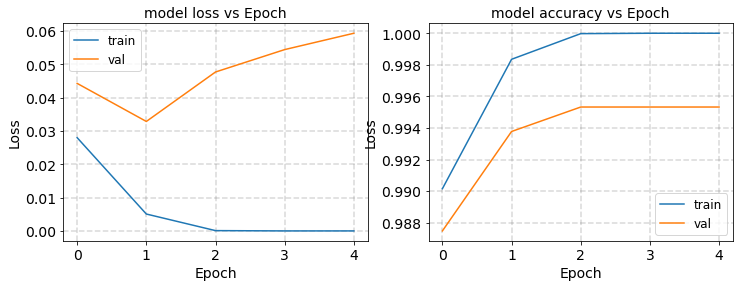

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0500 - accuracy: 0.9921 - val_loss: 0.0285 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 7.9378e-04 - accuracy: 0.9997 - val_loss: 0.0497 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0404 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 1.4876e-06 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 3s - loss: 2.0403e-07 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9952


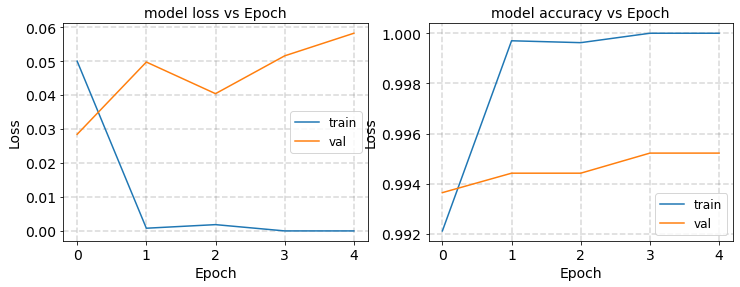

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0754 - accuracy: 0.9848 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0582 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 1.9217e-05 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 7.9735e-07 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 2.6581e-07 - accuracy: 1.0000 - val_loss: 0.1217 - val_accuracy: 0.9906


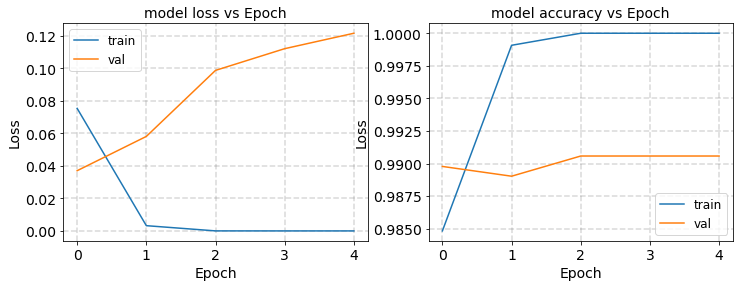

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0772 - accuracy: 0.9912 - val_loss: 0.0339 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0470 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0432 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 2.6230e-05 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 4s - loss: 4.3011e-06 - accuracy: 1.0000 - val_loss: 0.0577 - val_accuracy: 0.9945


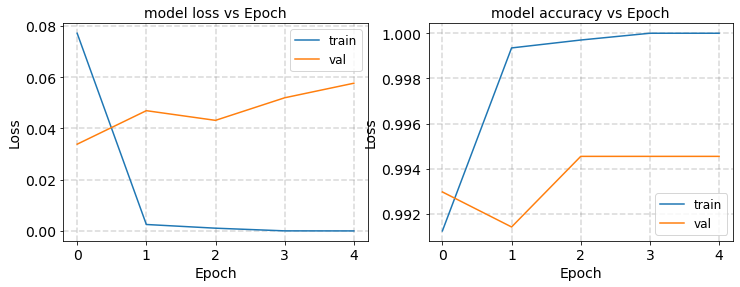

round1 [4 7 2 6]
4
Epoch 1/5
1250/1250 - 4s - loss: 0.0746 - accuracy: 0.9849 - val_loss: 0.0362 - val_accuracy: 0.9938
Epoch 2/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0404 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 4s - loss: 3.7252e-04 - accuracy: 0.9999 - val_loss: 0.0549 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 4s - loss: 1.1191e-05 - accuracy: 1.0000 - val_loss: 0.0625 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 3.7328e-06 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9906


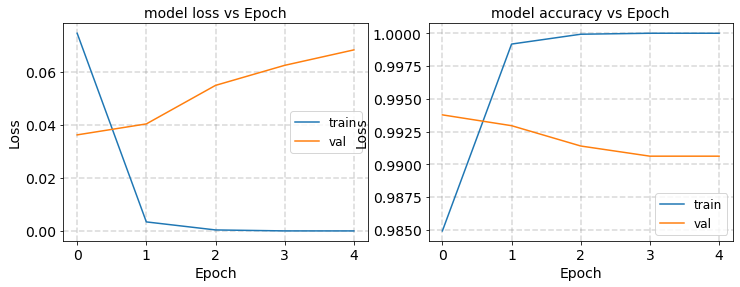

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0524 - accuracy: 0.9909 - val_loss: 0.0397 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0631 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 4s - loss: 1.1501e-05 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 2.2003e-06 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 6.8298e-07 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.9930


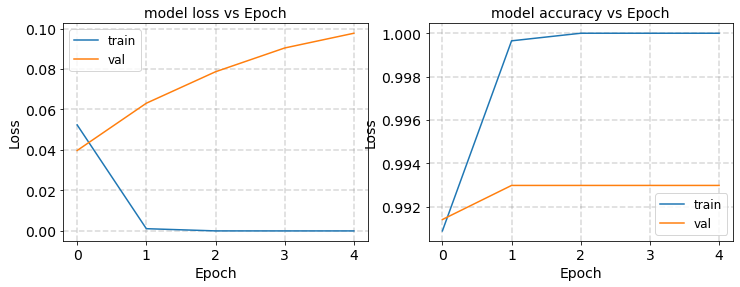

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1032 - accuracy: 0.9903 - val_loss: 0.0447 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0436 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 3.0325e-04 - accuracy: 0.9999 - val_loss: 0.0699 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 9.1382e-06 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 2.5535e-06 - accuracy: 1.0000 - val_loss: 0.0899 - val_accuracy: 0.9914


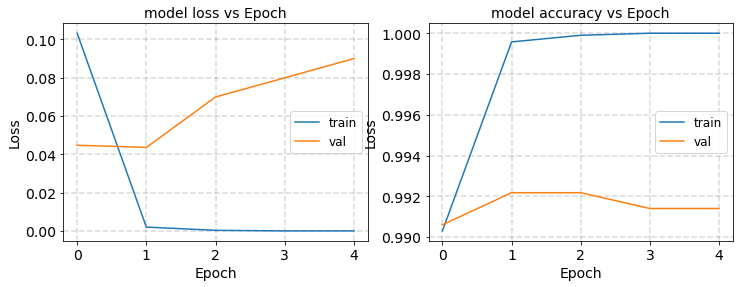

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0638 - accuracy: 0.9891 - val_loss: 0.0266 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 5.7423e-04 - accuracy: 0.9998 - val_loss: 0.0338 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 3.8444e-06 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 5.3251e-07 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.7705e-07 - accuracy: 1.0000 - val_loss: 0.0574 - val_accuracy: 0.9937


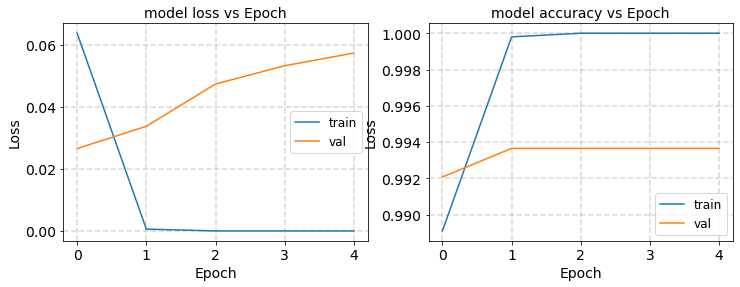

round2 [7 6 4 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.2011 - accuracy: 0.9917 - val_loss: 0.0202 - val_accuracy: 0.9938
Epoch 2/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0360 - val_accuracy: 0.9938
Epoch 3/5
1250/1250 - 3s - loss: 2.0533e-04 - accuracy: 0.9999 - val_loss: 0.0550 - val_accuracy: 0.9938
Epoch 4/5
1250/1250 - 3s - loss: 9.2982e-06 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy: 0.9938
Epoch 5/5
1250/1250 - 3s - loss: 1.4645e-06 - accuracy: 1.0000 - val_loss: 0.0788 - val_accuracy: 0.9938


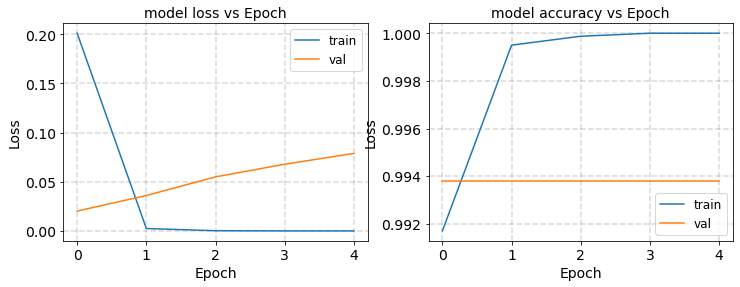

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0829 - accuracy: 0.9910 - val_loss: 0.0328 - val_accuracy: 0.9944
Epoch 2/5
1250/1250 - 3s - loss: 9.4535e-04 - accuracy: 0.9997 - val_loss: 0.0391 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 3.6885e-05 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 6.9812e-06 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.7285e-06 - accuracy: 1.0000 - val_loss: 0.0646 - val_accuracy: 0.9937


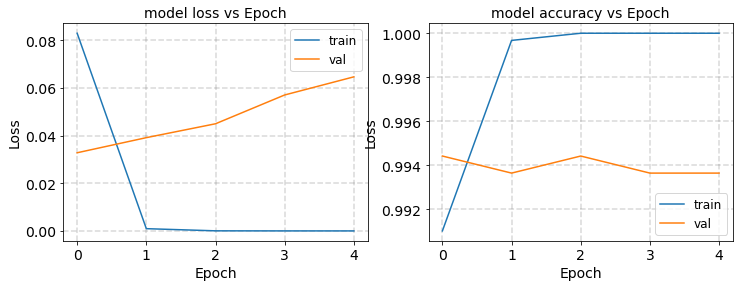

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0785 - accuracy: 0.9876 - val_loss: 0.0504 - val_accuracy: 0.9907
Epoch 2/5
1250/1250 - 3s - loss: 4.6614e-04 - accuracy: 0.9999 - val_loss: 0.0986 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 1.0306e-05 - accuracy: 1.0000 - val_loss: 0.1321 - val_accuracy: 0.9915
Epoch 4/5
1250/1250 - 4s - loss: 2.6392e-06 - accuracy: 1.0000 - val_loss: 0.1557 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 1.1453e-06 - accuracy: 1.0000 - val_loss: 0.1668 - val_accuracy: 0.9914


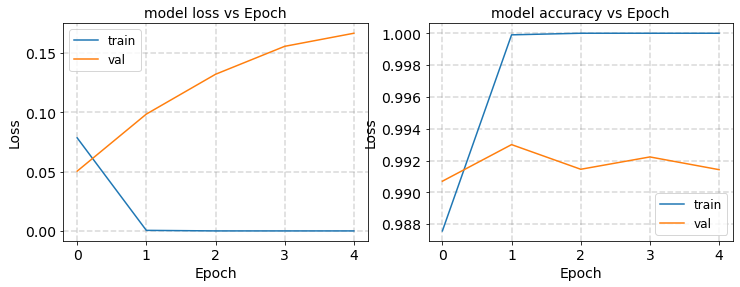

2
Epoch 1/5
1250/1250 - 4s - loss: 0.2069 - accuracy: 0.9897 - val_loss: 0.0748 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 4s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0896 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 4s - loss: 1.8743e-05 - accuracy: 1.0000 - val_loss: 0.1143 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 4.2922e-06 - accuracy: 1.0000 - val_loss: 0.1285 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 1.6301e-06 - accuracy: 1.0000 - val_loss: 0.1409 - val_accuracy: 0.9890


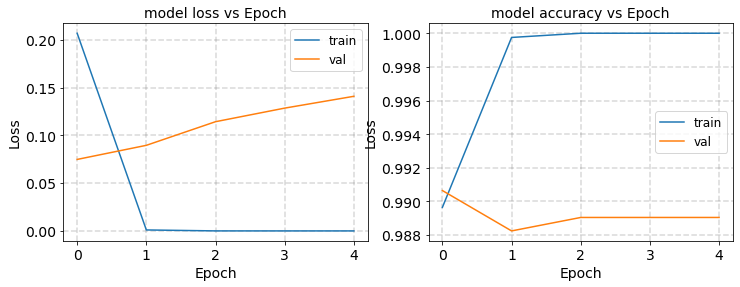

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_115 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_116 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_117 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_119 (Dense)            (None, 4)                 1028      
Total params: 399,364
Trainable params: 399,364
Non-trainable params: 0
_______________________________________________

In [12]:
%%time
series = [2,4,6,7]
num_runs = 10
name = '2467_seq_prune_0_4_256_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=256,
                                  num_output_nodes=4,
                                  pruning=None,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [13]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_0_4_256_run0  2.21569         2.16115      0.0272149   
2467_seq_prune_0_4_256_run1  2.12253         2.07891      0.0109412   
2467_seq_prune_0_4_256_run2  2.15474         2.10588      0.0151604   
2467_seq_prune_0_4_256_run3  2.17256           2.122      0.0190334   
2467_seq_prune_0_4_256_run4  2.16549         2.07433      0.0574724   
2467_seq_prune_0_4_256_run5   2.1385         2.10691      0.0148351   
2467_seq_prune_0_4_256_run6  2.09562         2.07701      0.0149975   
2467_seq_prune_0_4_256_run7  2.16955          2.1633       0.020562   
2467_seq_prune_0_4_256_run8  2.15247         2.11098      0.0150292   
2467_seq_prune_0_4_256_run9  2.06714         2.06723      0.0112387   

                            Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_0_4_256_run0     0.00608543        100       0          Yes   
2467_seq_prune_0_4_256_run1     0.00244653        100       0          Yes   
2467_seq_prune_0_4_256_run2     0.00338996        100       0          Yes   
2467_seq_prune_0_4_256_run3     0.00425601        100       0          Yes   
2467_seq_prune_0_4_256_run4      0.0128512         80     0.4           No   
2467_seq_prune_0_4_256_run5     0.00331722         95     0.1           No   
2467_seq_prune_0_4_256_run6     0.00335354         95     0.1           No   
2467_seq_prune_0_4_256_run7      0.0045978         50       1           No   
2467_seq_prune_0_4_256_run8     0.00336063        100       0          Yes   
2467_seq_prune_0_4_256_run9     0.00251305         50       1           No   

                            Direction  Accuracy  
2467_seq_prune_0_4_256_run0    larger    0.9124  
2467_seq_prune_0_4_256_run1    larger   0.88975  
2467_seq_prune_0_4_256_run2    larger  0.959225  
2467_seq_prune_0_4_256_run3    larger   0.94665  
2467_seq_prune_0_4_256_run4    larger  0.957025  
2467_seq_prune_0_4_256_run5    larger  0.937225  
2467_seq_prune_0_4_256_run6    larger   0.95765  
2467_seq_prune_0_4_256_run7    larger   0.93655  
2467_seq_prune_0_4_256_run8    larger  0.945175  
2467_seq_prune_0_4_256_run9    larger  0.953675

#### Save dataframe

In [14]:
import pickle
path = './Exps/'
with open(path + 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open(path + 'df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_0_4_256_run0  2.21569         2.16115      0.0272149   
2467_seq_prune_0_4_256_run1  2.12253         2.07891      0.0109412   
2467_seq_prune_0_4_256_run2  2.15474         2.10588      0.0151604   
2467_seq_prune_0_4_256_run3  2.17256           2.122      0.0190334   
2467_seq_prune_0_4_256_run4  2.16549         2.07433      0.0574724   
2467_seq_prune_0_4_256_run5   2.1385         2.10691      0.0148351   
2467_seq_prune_0_4_256_run6  2.09562         2.07701      0.0149975   
2467_seq_prune_0_4_256_run7  2.16955          2.1633       0.020562   
2467_seq_prune_0_4_256_run8  2.15247         2.11098      0.0150292   
2467_seq_prune_0_4_256_run9  2.06714         2.06723      0.0112387   

                            Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_0_4_256_run0     0.00608543        100       0          Yes   
2467_seq_prune_0_4_256_run1     0.00244653        100       0          Yes   
2467_seq_prune_0_4_256_run2     0.00338996        100       0          Yes   
2467_seq_prune_0_4_256_run3     0.00425601        100       0          Yes   
2467_seq_prune_0_4_256_run4      0.0128512         80     0.4           No   
2467_seq_prune_0_4_256_run5     0.00331722         95     0.1           No   
2467_seq_prune_0_4_256_run6     0.00335354         95     0.1           No   
2467_seq_prune_0_4_256_run7      0.0045978         50       1           No   
2467_seq_prune_0_4_256_run8     0.00336063        100       0          Yes   
2467_seq_prune_0_4_256_run9     0.00251305         50       1           No   

                            Direction  Accuracy  
2467_seq_prune_0_4_256_run0    larger    0.9124  
2467_seq_prune_0_4_256_run1    larger   0.88975  
2467_seq_prune_0_4_256_run2    larger  0.959225  
2467_seq_prune_0_4_256_run3    larger   0.94665  
2467_seq_prune_0_4_256_run4    larger  0.957025  
2467_seq_prune_0_4_256_run5    larger  0.937225  
2467_seq_prune_0_4_256_run6    larger   0.95765  
2467_seq_prune_0_4_256_run7    larger   0.93655  
2467_seq_prune_0_4_256_run8    larger  0.945175  
2467_seq_prune_0_4_256_run9    larger  0.953675

In [15]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.06570067,  0.034043  ,  0.01018012, ..., -0.01366998,
        -0.06761528,  0.05221929],
       [ 0.06249735,  0.03785811,  0.03664061, ..., -0.01221479,
         0.00210059, -0.01342079],
       [-0.05335947, -0.00534542,  0.02020513, ..., -0.06714088,
        -0.06811404,  0.05573267],
       ...,
       [-0.0138393 ,  0.00807367, -0.06937314, ...,  0.01616443,
        -0.02705944,  0.02223694],
       [ 0.00979229, -0.05760012, -0.00474477, ...,  0.01851469,
        -0.04656146,  0.05029406],
       [ 0.01205922, -0.04453917, -0.04050506, ..., -0.06735998,
         0.05584086,  0.01305799]], dtype=float32)

#### Look at results of first experiment

In [16]:
for val in exp_dict[name + str(0)]:
    print(val)

2.215689117398336
2.161145093364989
0.027214867178493238
0.006085429300973878
100.0
0.0
Yes
larger
0.9124000072479248
